# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,3,3,3,7,7,7,7,7
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,158,266,301,387,387,502,589,690,745,820
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,160,194,235,249,265,290,329,407,424,482
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,9,19,32,39,39,53,62,71,77,78
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,436,669,669,818,1029,1219,1405,1617,1791,2032


## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,Population,region
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,"35,530,000",Afghanistan_nan
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,NaN,Albania_nan
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,"41,320,000",Algeria_nan
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,NaN,Andorra_nan
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,NaN,Angola_nan
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,7,7,7,7,7,NaN,Antigua and Barbuda_nan
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,301,387,387,502,589,690,745,820,NaN,Argentina_nan
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,235,249,265,290,329,407,424,482,NaN,Armenia_nan
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,32,39,39,53,62,71,77,78,NaN,Australia_Australian Capital Territory
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,669,818,1029,1219,1405,1617,1791,2032,"7,544,000",Australia_New South Wales


In [5]:
# merge region death
death.iloc[175:185,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,Population,region
175,NaN,Nigeria,9.0820,8.6753,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,NaN,Nigeria_nan
176,NaN,North Macedonia,41.6086,21.7453,0,0,0,0,0,0,...,2,2,3,3,3,4,6,7,"2,077,000",North Macedonia_nan
177,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,10,12,14,14,19,23,25,32,"5,357,000",Norway_nan
178,NaN,Oman,21.0000,57.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"4,636,000",Oman_nan
179,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,6,7,8,9,11,12,14,21,"197,000,000",Pakistan_nan
180,NaN,Panama,8.5380,-80.7821,0,0,0,0,0,0,...,6,6,8,8,9,14,17,24,NaN,Panama_nan
181,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Papua New Guinea_nan
182,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,...,1,2,3,3,3,3,3,3,NaN,Paraguay_nan
183,NaN,Peru,-9.1900,-75.0152,0,0,0,0,0,0,...,5,7,9,9,11,16,18,24,NaN,Peru_nan
184,NaN,Philippines,13.0000,122.0000,0,0,0,0,0,0,...,33,35,38,45,54,68,71,78,"104,900,000",Philippines_nan


In [6]:
# merge region recover
recover.iloc[175:185,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,Population,region
175,NaN,Oman,21.0000,57.0000,0,0,0,0,0,0,...,17,17,17,23,23,23,23,29,"4,636,000",Oman_nan
176,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,5,18,21,21,23,29,29,76,"197,000,000",Pakistan_nan
177,NaN,Panama,8.5380,-80.7821,0,0,0,0,0,0,...,0,1,1,2,2,2,4,4,NaN,Panama_nan
178,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Papua New Guinea_nan
179,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,NaN,Paraguay_nan
180,NaN,Peru,-9.1900,-75.0152,0,0,0,0,0,0,...,1,1,1,14,16,16,16,53,NaN,Peru_nan
181,NaN,Philippines,13.0000,122.0000,0,0,0,0,0,0,...,17,20,26,28,31,35,42,42,"104,900,000",Philippines_nan
182,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,1,1,7,7,7,7,7,7,"37,980,000",Poland_nan
183,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,5,22,22,43,43,43,43,43,"10,290,000",Portugal_nan
184,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,33,41,41,43,43,45,48,51,NaN,Qatar_nan


In [7]:
confirmed.iloc[175:185,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,Population,region
175,NaN,Nigeria,9.0820,8.6753,0,0,0,0,0,0,...,40,44,51,65,70,89,111,131,NaN,Nigeria_nan
176,NaN,North Macedonia,41.6086,21.7453,0,0,0,0,0,0,...,136,148,177,201,219,241,259,285,"2,077,000",North Macedonia_nan
177,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,2621,2863,3084,3369,3755,4015,4284,4445,"5,357,000",Norway_nan
178,NaN,Oman,21.0000,57.0000,0,0,0,0,0,0,...,66,84,99,109,131,152,167,179,"4,636,000",Oman_nan
179,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,875,972,1063,1201,1373,1495,1597,1717,"197,000,000",Pakistan_nan
180,NaN,Panama,8.5380,-80.7821,0,0,0,0,0,0,...,345,345,443,558,674,786,901,989,NaN,Panama_nan
181,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,NaN,Papua New Guinea_nan
182,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,...,22,27,37,41,52,56,59,64,NaN,Paraguay_nan
183,NaN,Peru,-9.1900,-75.0152,0,0,0,0,0,0,...,395,416,480,580,635,671,852,950,NaN,Peru_nan
184,NaN,Philippines,13.0000,122.0000,0,0,0,0,0,0,...,462,552,636,707,803,1075,1418,1546,"104,900,000",Philippines_nan


In [8]:
confirmed.iloc[220:230,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,Population,region
220,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,5,6,8,8,8,8,8,12,NaN,United Kingdom_Cayman Islands
221,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,36,36,46,66,88,97,108,141,NaN,United Kingdom_Channel Islands
222,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,15,15,26,35,55,56,65,69,NaN,United Kingdom_Gibraltar
223,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,13,23,23,25,29,32,42,49,NaN,United Kingdom_Isle of Man
224,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,1,1,1,5,5,5,5,5,NaN,United Kingdom_Montserrat
225,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,6650,8077,9529,11658,14543,17089,19522,22141,"66,440,000",United Kingdom_nan
226,NaN,Uruguay,-32.5228,-55.7658,0,0,0,0,0,0,...,162,162,189,217,238,274,304,310,NaN,Uruguay_nan
227,NaN,United States,37.0902,-95.7129,1,1,2,2,5,5,...,43847,53740,65778,83836,101657,121478,140886,161807,"327,200,000",United States_nan
228,NaN,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,...,46,50,60,75,88,104,144,149,NaN,Uzbekistan_nan
229,NaN,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,...,77,84,91,107,107,119,119,135,NaN,Venezuela_nan


## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:

## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute

ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major 2nd Areas')

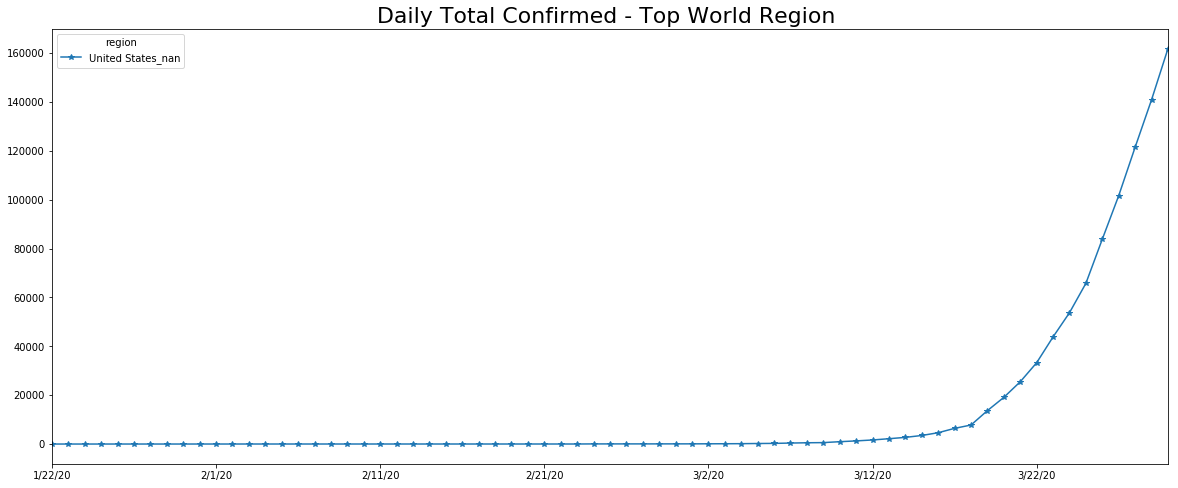

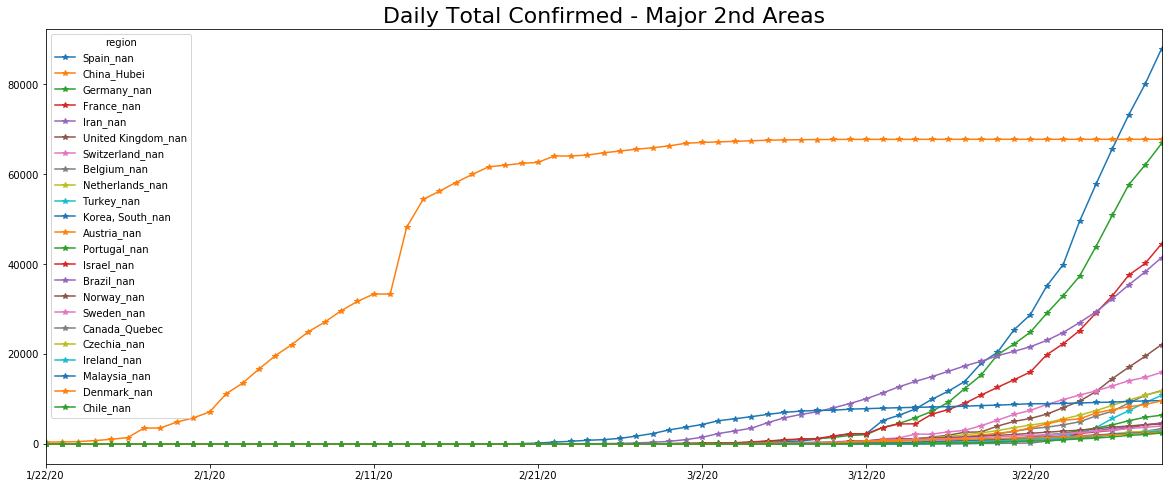

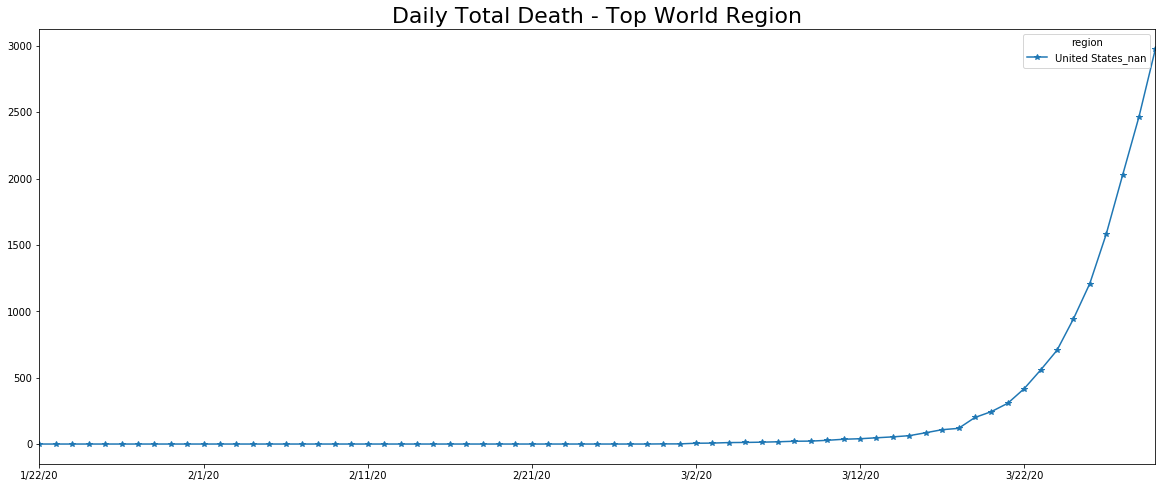

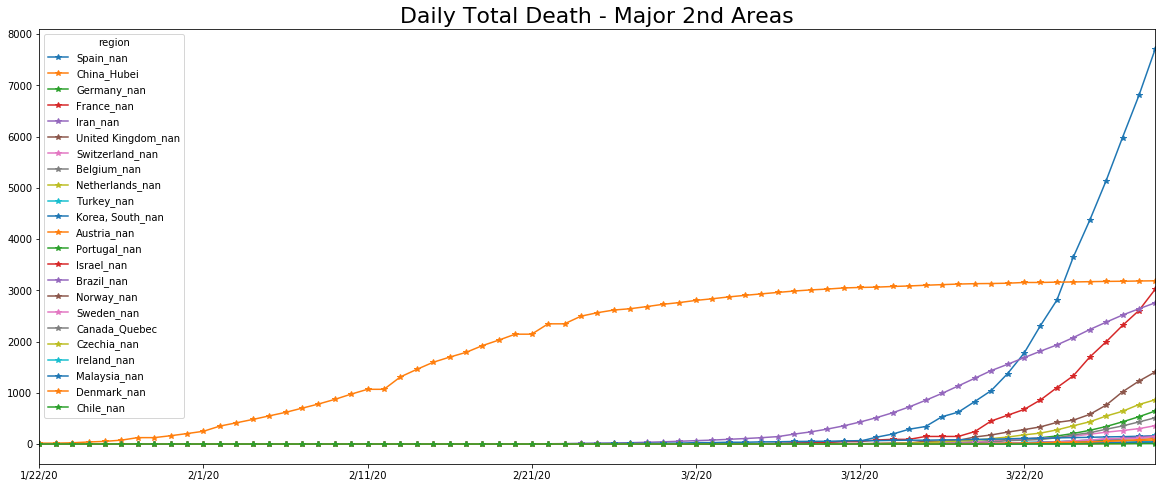

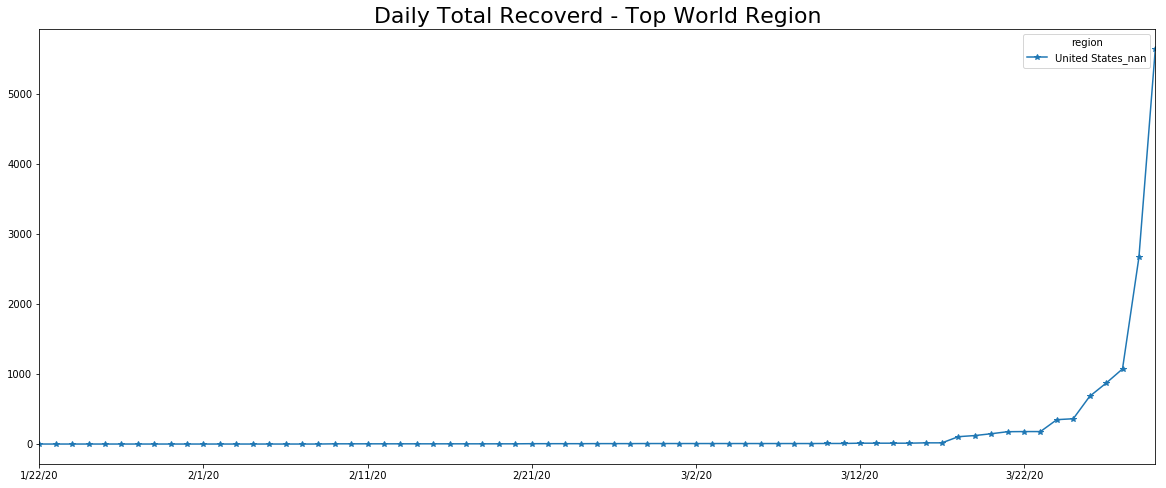

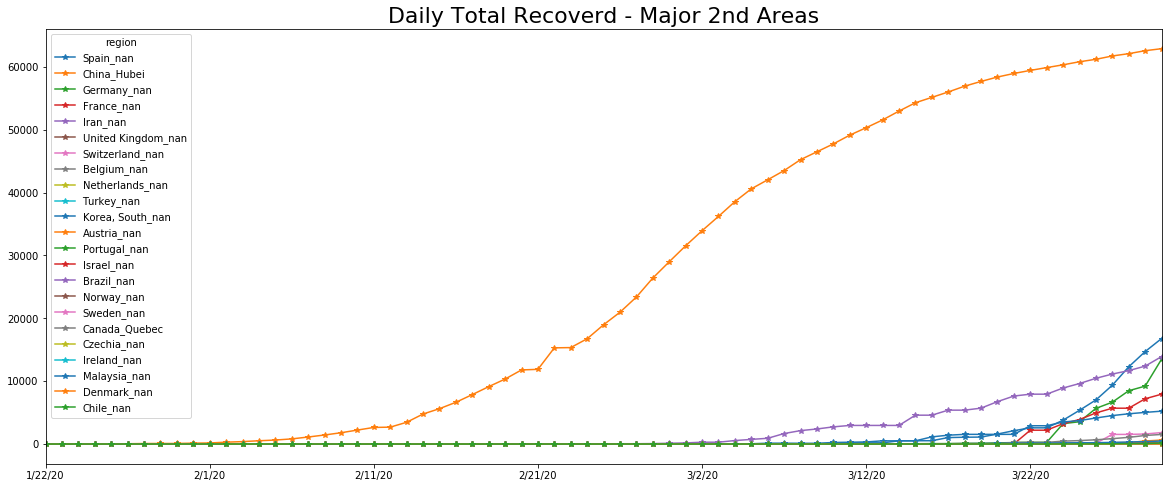

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Confirmed - Top World Region ',fontdict={'fontsize': 22})
p.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Confirmed - Major 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Death - Top World Region',fontdict={'fontsize': 22})
p_d.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Death - Major 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Recoverd - Top World Region',fontdict={'fontsize': 22})
p_r.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Recoverd - Major 2nd Areas',fontdict={'fontsize': 22})

## Kalman Filter With R

In [13]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'/home/notebookuser/notebooks/covid19/korean/ts_r.csv')

In [14]:
#!pip install rpy2


In [15]:
import rpy2
%load_ext rpy2.ipython

In [16]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [17]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [18]:
%%R
require(pracma)
require(Metrics)
require(readr)
Sys.setenv(TZ='GMT')
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_2_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [19]:
p=%R pred_all

In [20]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

### Extract Weather Data

In [21]:
!pip install pyweatherbit


In [22]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com


api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [23]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan' 
       #   'Vietnam_nan',
       ]
#

In [24]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_start_date='2020-03-15'
my_offset_days=16

w=pd.DataFrame(columns=['date','region','min','max'])
for i in range (1,len(confirmed)):
    start_date=pd.to_datetime(my_start_date)
    if confirmed.iloc[i,vpos] not in my_train_list:
        continue
    for j in range (4,confirmed.shape[1]-2):
        jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=my_offset_days)).strftime('%Y-%m-%d')).json
        # j=json_normalize(j)
        # j=j['data']
        # max_temp=json_normalize(j['data'])['max_temp'].values[0] # max
        # min_temp=json_normalize(j['data'])['min_temp'].values[0]
        try:
            w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
        except Exception:
            w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
        start_date=start_date+ pd.DateOffset(days=1)
    

xcountry_region=Albania_nan


HTTPError: 429 Client Error:  for url: https://api.weatherbit.io/v2.0/history/daily?key=30b114eb7ebb45069cd287adadf9d3b7&lat=-33.8688&lon=151.2093&start_date=2020-03-15&end_date=2020-03-31

In [24]:
w.to_csv(r'w_v2_v2.csv')

In [25]:
# ################## Update Recent Day Weather

# ################## already done since API is limited to 500 call per day
## consume Wether data From 21/03/2020 forward
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_start_date='2020-03-31'
my_offset_days=1

w_update=pd.DataFrame(columns=['date','region','min','max'])
for i in range (1,len(confirmed)):
    start_date=pd.to_datetime(my_start_date)
    if confirmed.iloc[i,vpos] not in my_train_list:
        continue
    for j in range (confirmed.shape[1]-4,confirmed.shape[1]-2):
        jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
        try:
            w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
        except Exception:
            w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
        start_date=start_date+ pd.DateOffset(days=my_offset_days)

xcountry_region=Albania


In [26]:
w_update.to_csv(r'w_update_v2.csv')

### Extract Weather Forecast Data

In [27]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

In [25]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%d/%m/%Y')

w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2['date'],format='%d/%m/%Y')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [26]:
w_total=pd.DataFrame()
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'w_total.csv')

/home/notebookuser/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [27]:
w_total[1910:]

,Unnamed: 0,date,max,min,region
1294,NaN,2020-02-10,16.3,0.3,China_Shanghai
1295,NaN,2020-02-11,16.3,3.3,China_Shanghai
1296,NaN,2020-02-12,15.5,8.3,China_Shanghai
1297,NaN,2020-02-13,16.1,9.4,China_Shanghai
1298,NaN,2020-02-14,18.9,12.1,China_Shanghai
1299,NaN,2020-02-15,14.7,2.9,China_Shanghai
1300,NaN,2020-02-16,11.0,8.0,China_Shanghai
1301,NaN,2020-02-17,15.3,2.2,China_Shanghai
1116,NaN,2020-02-18,9.4,3.0,China_Shanghai
1117,NaN,2020-02-19,11.7,4.0,China_Shanghai


### Build Train Set Data Structure

In [28]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [29]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
### Joao - Fix NaN Kalman_Filter
#t['kalman_prediction']=round(t['kalman_prediction'])
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'],2)
#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame()
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  


## Kalman 1 day Prediction with Evaluation

         region           mse          rmse           mae
69  China_Hubei  3.032476e+09  55067.921682  48826.782609


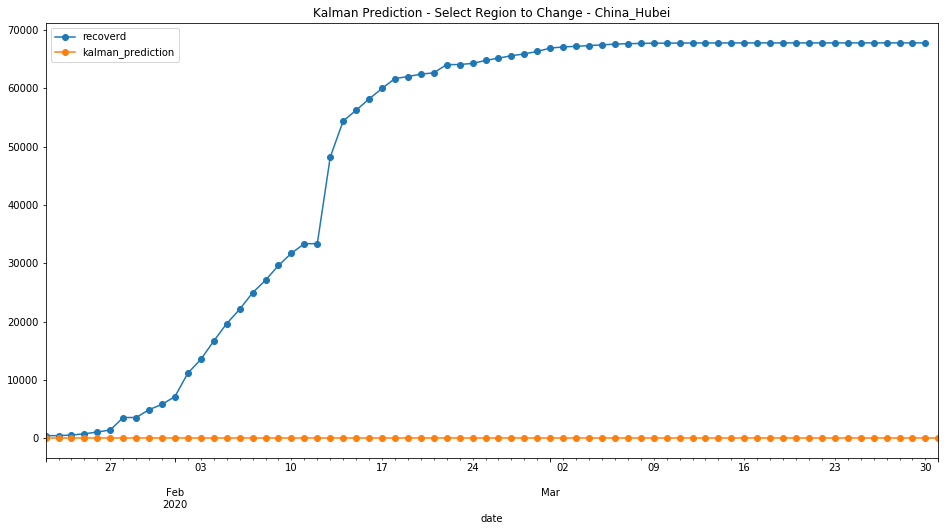

In [30]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse         rmse           mae
147  Italy_nan  1.045814e+09  32339.04938  16018.797101


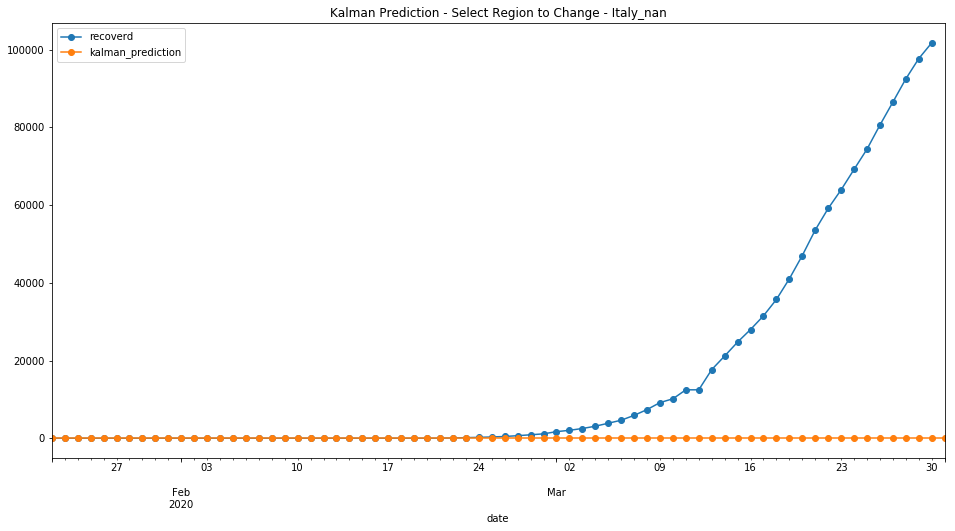

In [31]:
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
218  Spain_nan  5.106957e+08  22598.578238  9373.536232


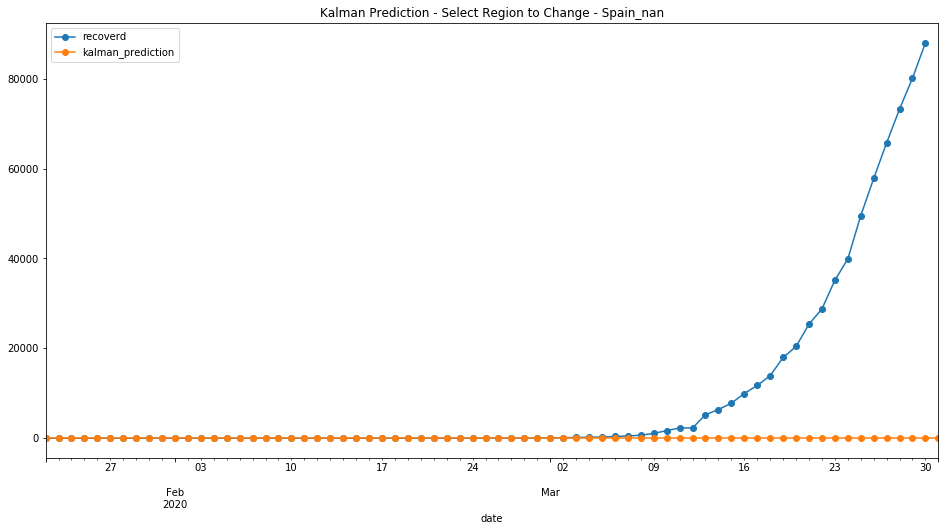

In [32]:
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse          rmse           mae
246  United States_nan  1.300725e+09  36065.562907  13026.014493


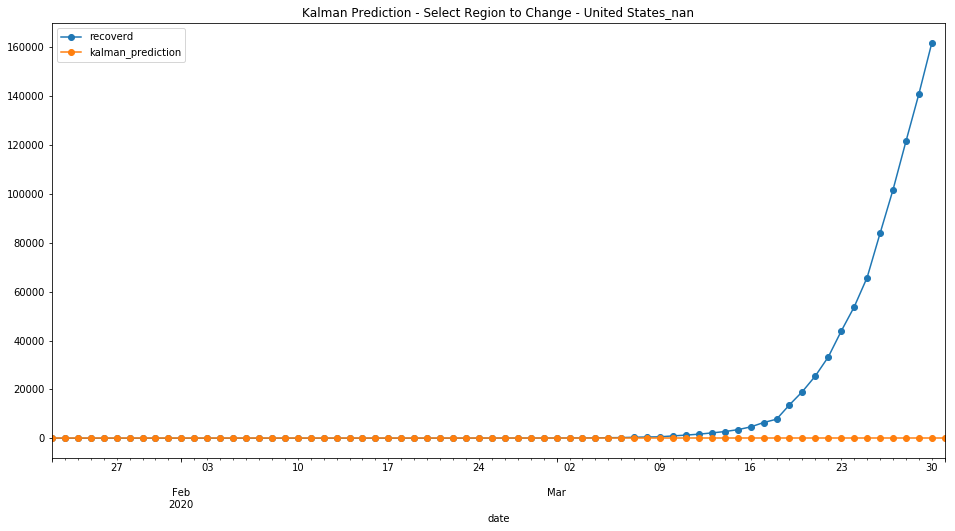

In [33]:
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
245  United Kingdom_nan  2.621392e+07  5119.953231  2008.797101


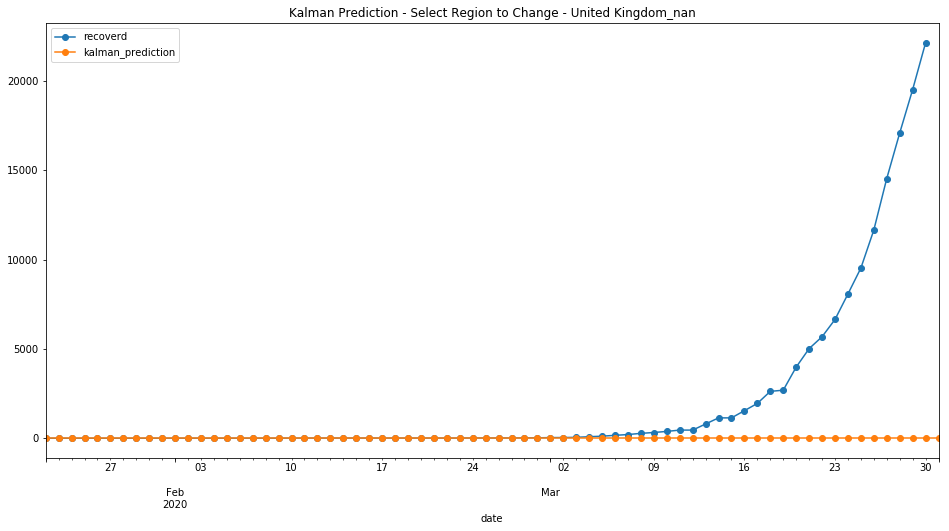

In [34]:
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [35]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7n5mzrx4
  JVM stdout: /tmp/tmp7n5mzrx4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7n5mzrx4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/GMT
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,"1 year, 5 months and 4 days !!!"
H2O cluster name:,H2O_from_python_unknownUser_t8yvz1
H2O cluster total nodes:,1
H2O cluster free memory:,5 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [36]:
##
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan' 
      #   'Vietnam_nan',
       ]
#

In [37]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-21']
boots=train_df[train_df['date']>='2020-03-27'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-03-18']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-03-21']
test=test[test['date']<'2020-03-31']
test_v2=test[test['region'].isin(region_to_train)]

In [38]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
          ]

In [39]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
pred2.iloc[:55]

,0,confirmed,date,region
0,33.0,24,2020-03-21,Afghanistan_nan
1,31.0,40,2020-03-22,Afghanistan_nan
2,55.0,40,2020-03-23,Afghanistan_nan
3,49.0,74,2020-03-24,Afghanistan_nan
4,101.0,84,2020-03-25,Afghanistan_nan
5,103.0,94,2020-03-26,Afghanistan_nan
6,116.0,110,2020-03-27,Afghanistan_nan
7,132.0,110,2020-03-28,Afghanistan_nan
8,126.0,120,2020-03-29,Afghanistan_nan
9,137.0,170,2020-03-30,Afghanistan_nan


In [40]:
pred2.iloc[100:150]

,0,confirmed,date,region
100,17.0,3,2020-03-21,Australia_Northern Territory
101,13.0,5,2020-03-22,Australia_Northern Territory
102,20.0,5,2020-03-23,Australia_Northern Territory
103,15.0,6,2020-03-24,Australia_Northern Territory
104,18.0,6,2020-03-25,Australia_Northern Territory
105,16.0,12,2020-03-26,Australia_Northern Territory
106,31.0,12,2020-03-27,Australia_Northern Territory
107,21.0,15,2020-03-28,Australia_Northern Territory
108,27.0,15,2020-03-29,Australia_Northern Territory
109,22.0,15,2020-03-30,Australia_Northern Territory


In [41]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF

,variable,relative_importance,scaled_importance,percentage
0,last_day,3.313972e+13,1.000000,0.476513
1,region,1.723945e+13,0.520205,0.247884
2,7_day_change,7.000255e+12,0.211235,0.100656
3,3_day_change,3.368476e+12,0.101645,0.048435
4,7_day_change_rate,2.197530e+12,0.066311,0.031598
5,1_day_change,2.046642e+12,0.061758,0.029428
6,3_day_change_rate,1.729977e+12,0.052203,0.024875
7,1_day_change_rate,1.214708e+12,0.036654,0.017466
8,max,7.702829e+11,0.023243,0.011076
9,infected_rate,4.810513e+11,0.014516,0.006917


In [43]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


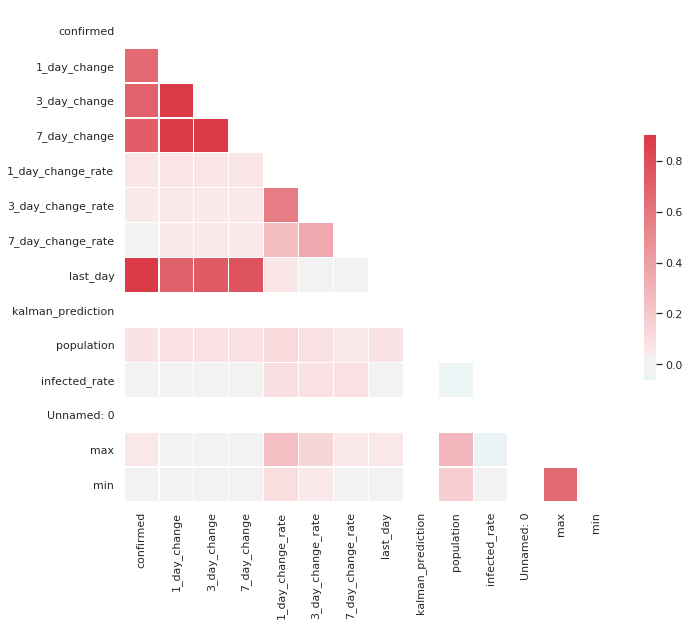

In [44]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [45]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.671497
3_day_change         0.695715
7_day_change         0.716537
1_day_change_rate    0.062504
3_day_change_rate    0.037250
7_day_change_rate    0.023748
last_day             0.930111
kalman_prediction         NaN
population           0.077500
infected_rate        0.004680
Unnamed: 0                NaN
max                  0.056931
min                  0.014818
Name: confirmed, dtype: float64


Text(0.5, 1.0, 'Daily Min/Max Temperature - Italy')

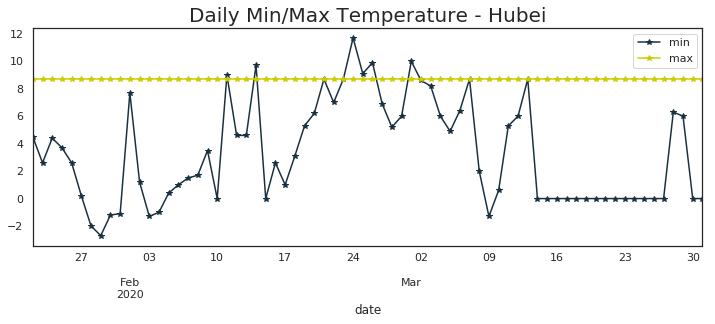

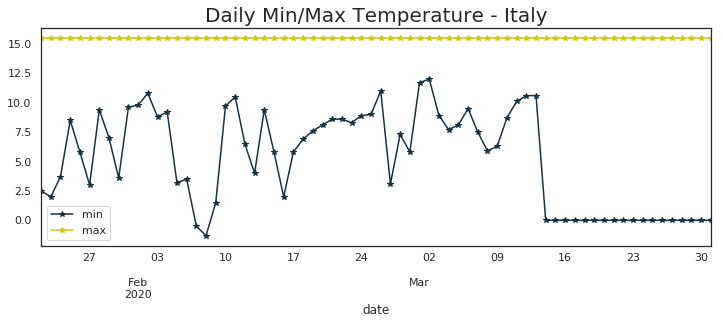

In [46]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')

p=p[p['region']=='China_Hubei']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Hubei',fontdict={'fontsize': 20})

## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='Italy_nan']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Italy',fontdict={'fontsize': 20})
#
#

In [47]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min   max
region                                   
China_Hubei                3.305714   8.7
Italy_nan                  5.208571  15.5
United States_nan          0.000000   0.0
Spain_nan                  5.177143  11.6
Germany_nan                1.115714   1.0
Iran_nan                   3.168571   0.0
France_nan                 1.815714   8.5
Korea, South_nan          -0.732857   7.3
United Kingdom_nan         0.771429  11.2
Switzerland_nan           -1.712857   0.0
Netherlands_nan            0.000000   0.0
China_Guangdong           10.720000  25.6
Belgium_nan                2.642857   2.0
Austria_nan               -1.685714   0.0
China_Henan                1.078571   7.7
China_Zhejiang             5.321429  21.2
China_Hunan                5.208571   8.3
China_Anhui                3.277143   7.0
China_Jiangxi              6.788571  15.7
Norway_nan                -3.238571   0.0
Turkey_nan                 0.000000   0.

##Kalman X Days Ahead Prediction

In [48]:
%%R

#install.packages('reshape')

NULL


In [49]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/korean/ts_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [50]:
all_new=%R all_new

In [51]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

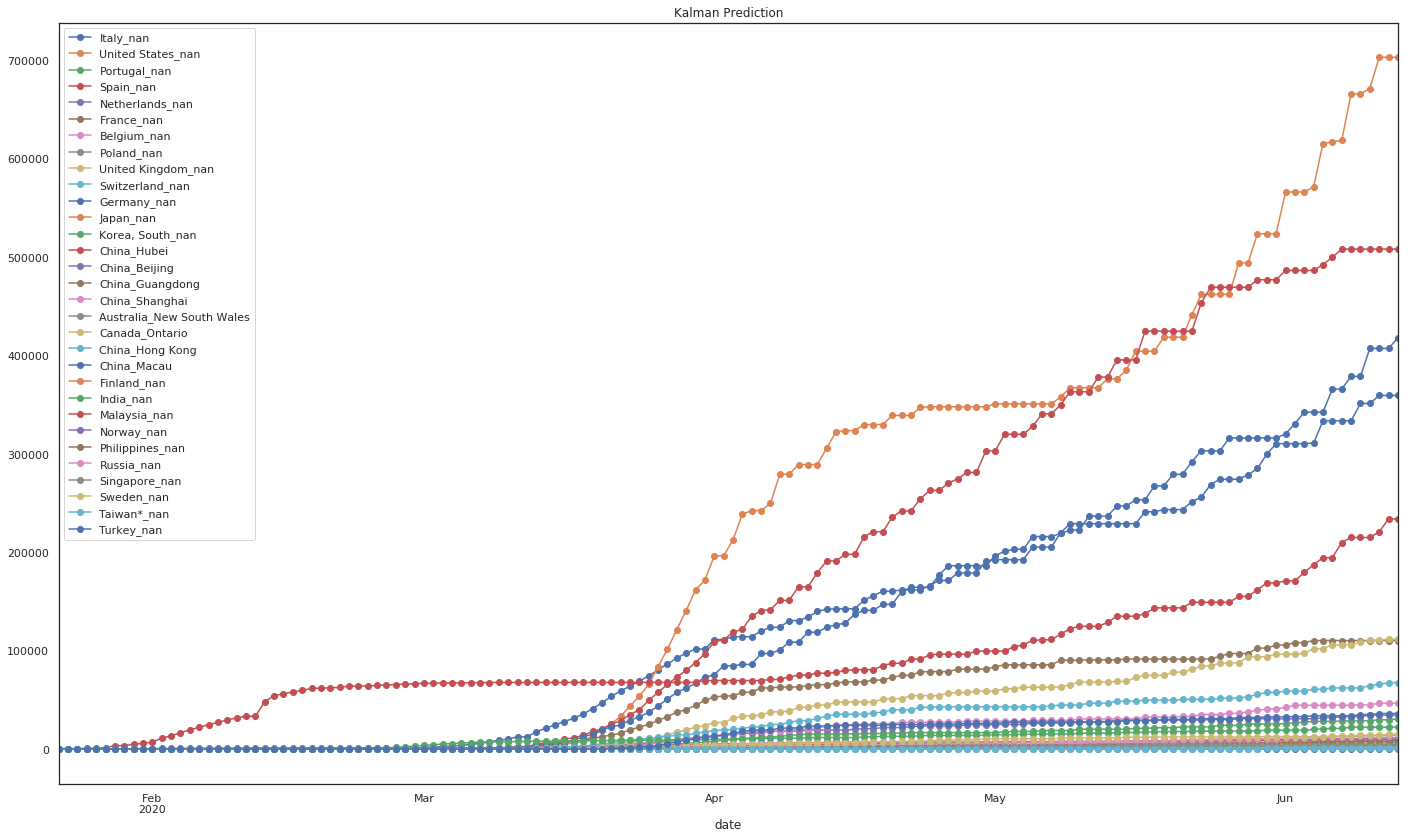

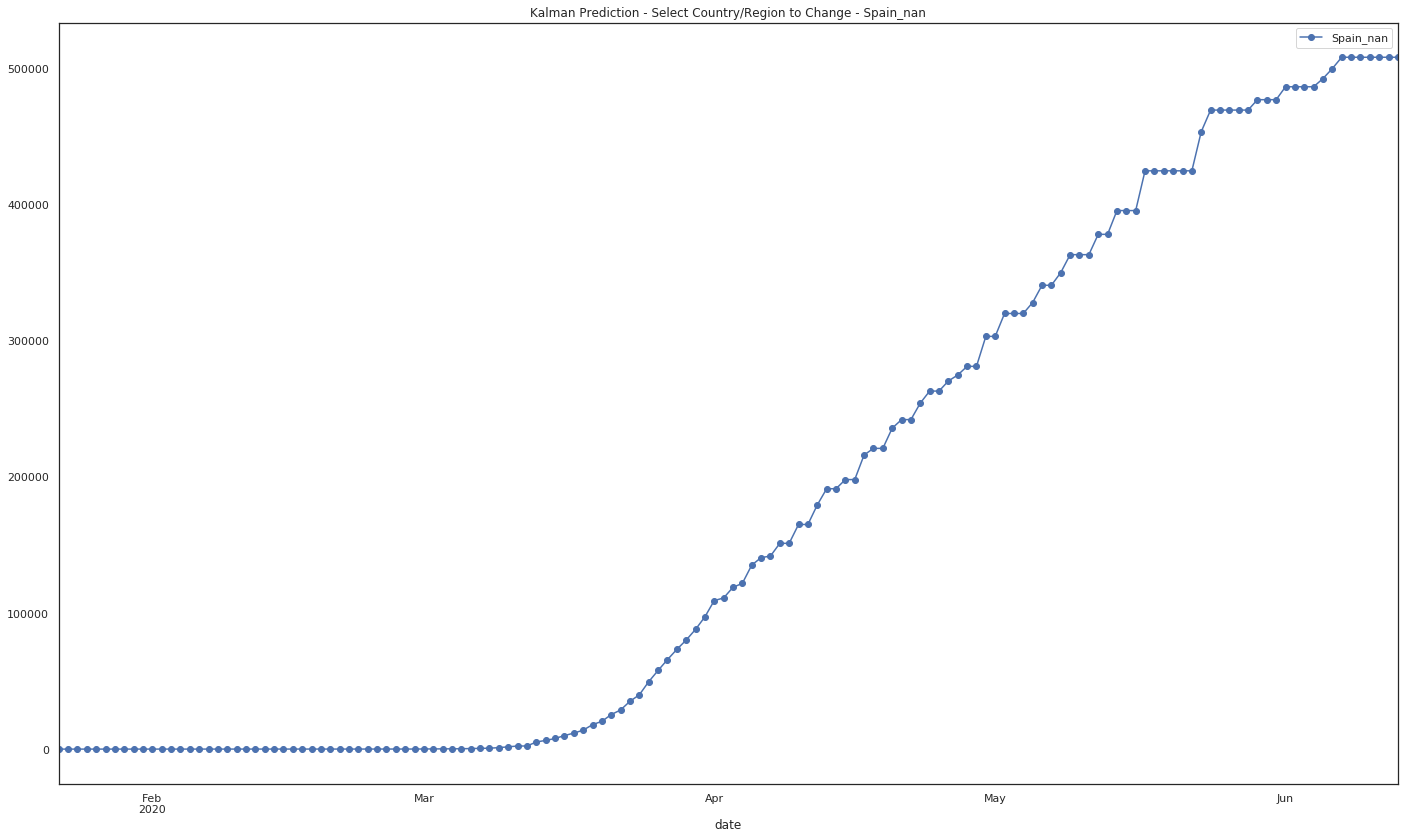

In [52]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


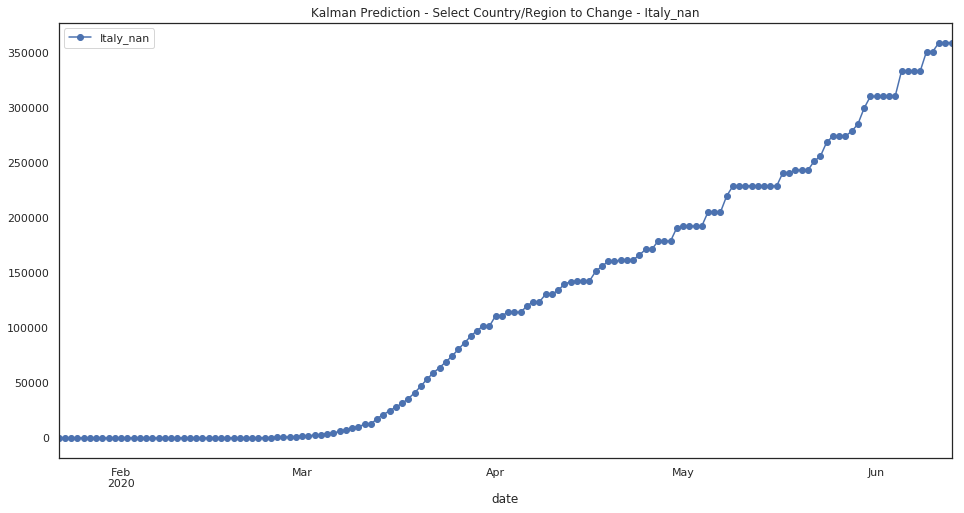

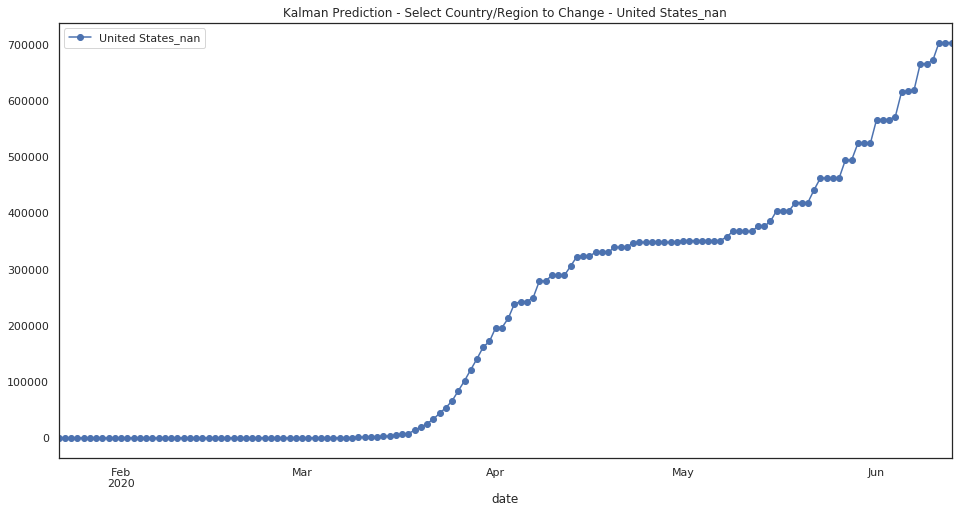

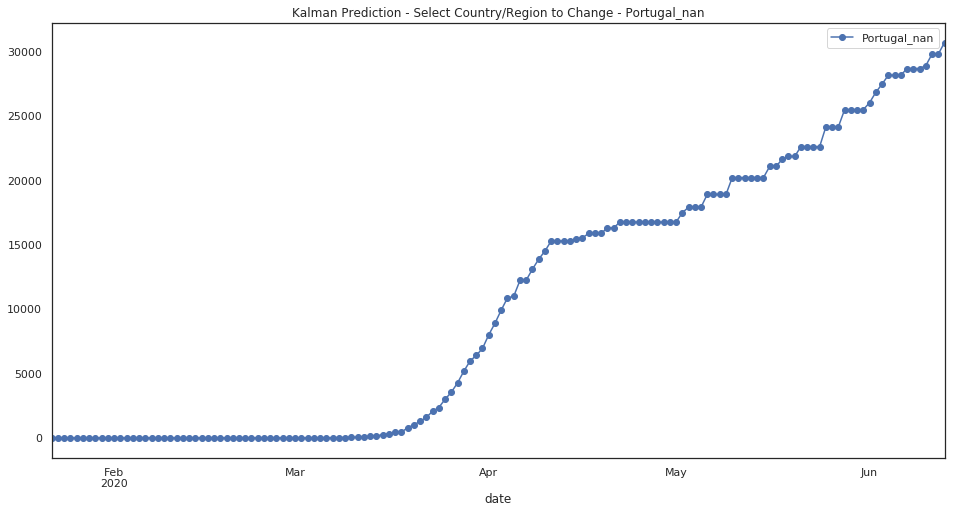

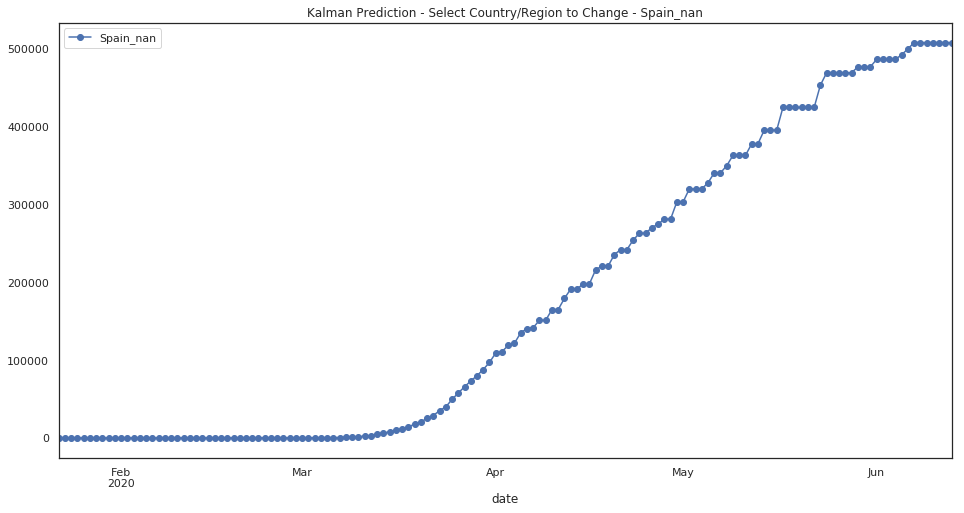

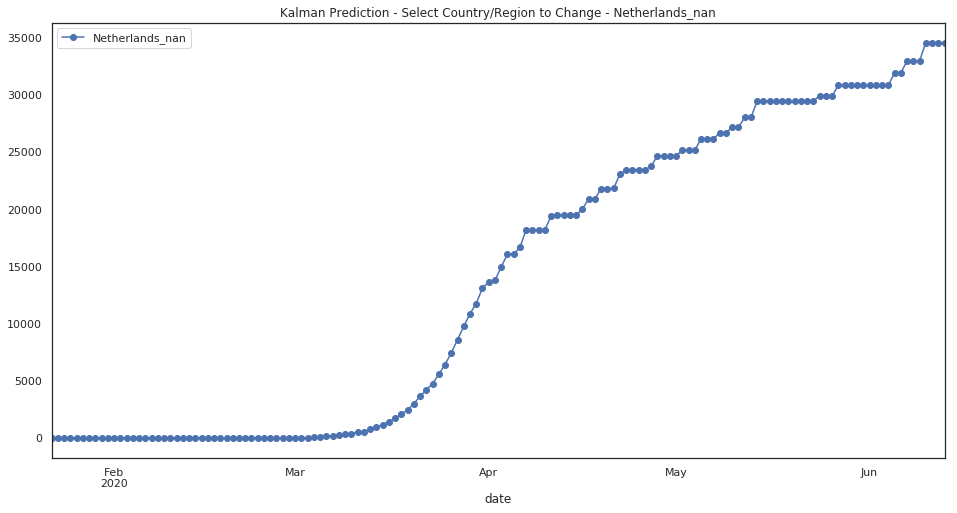

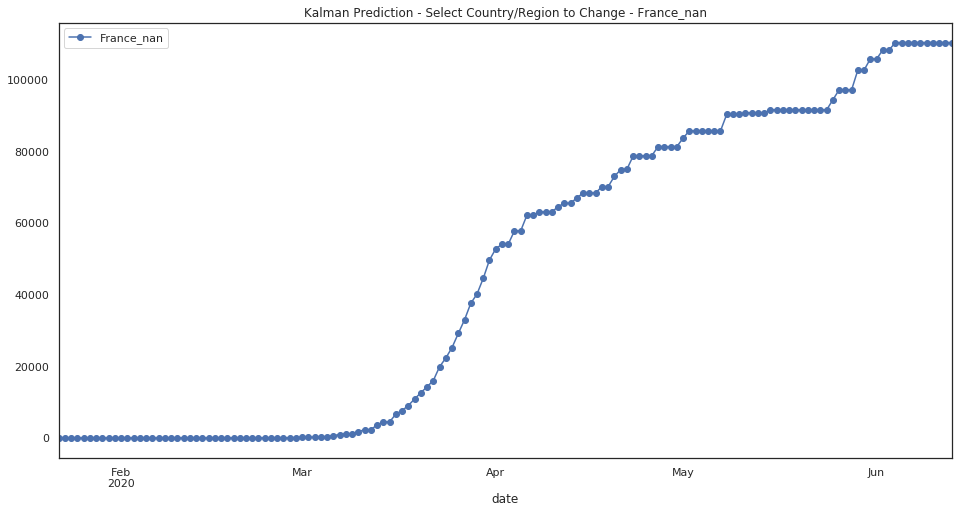

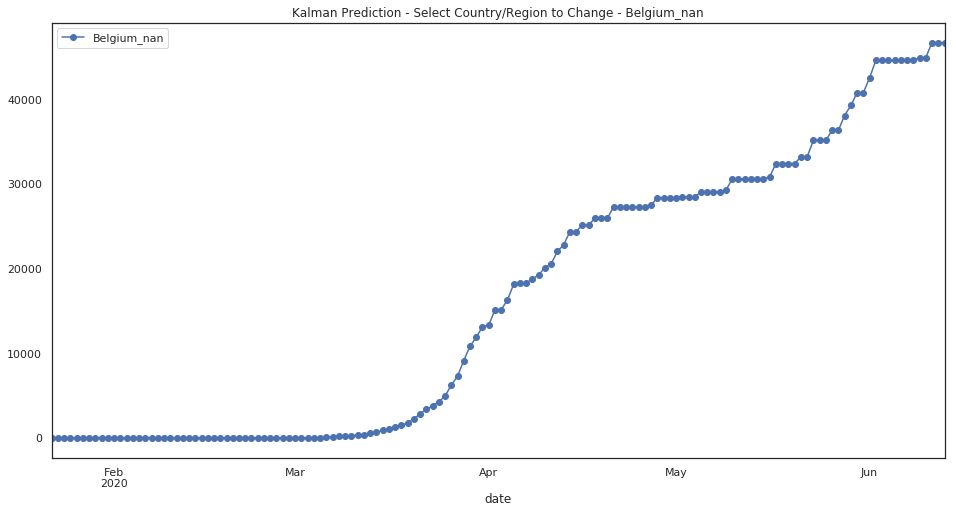

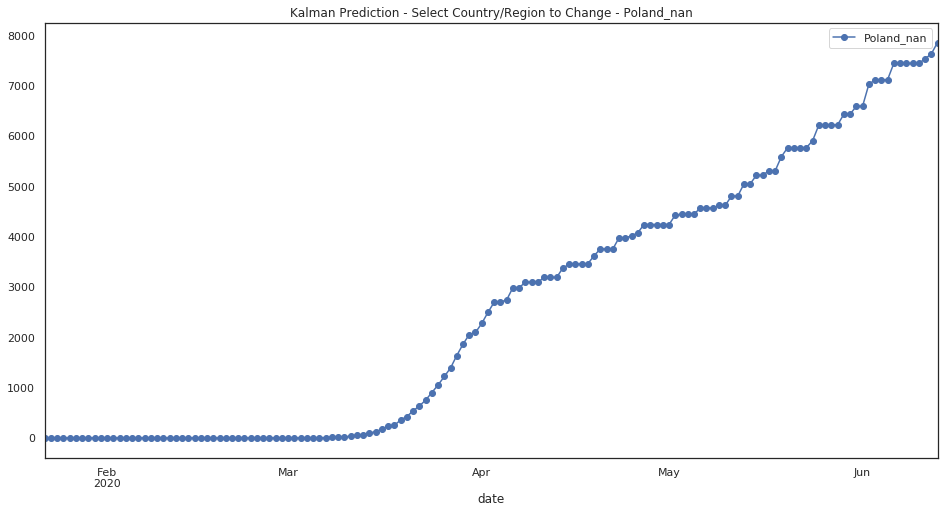

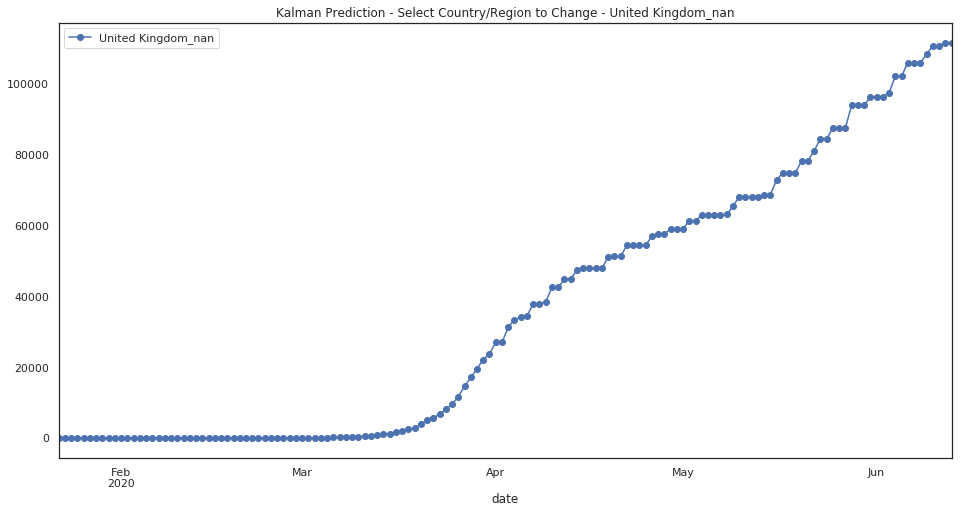

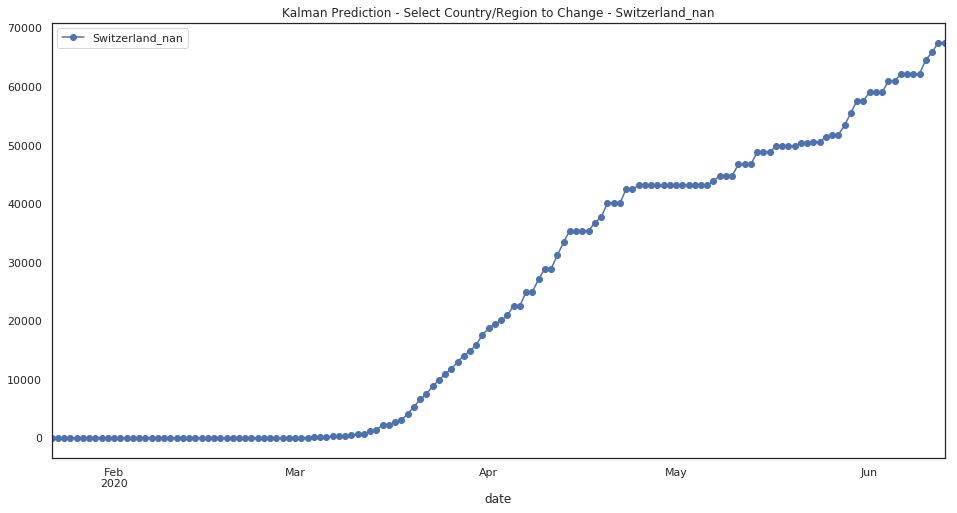

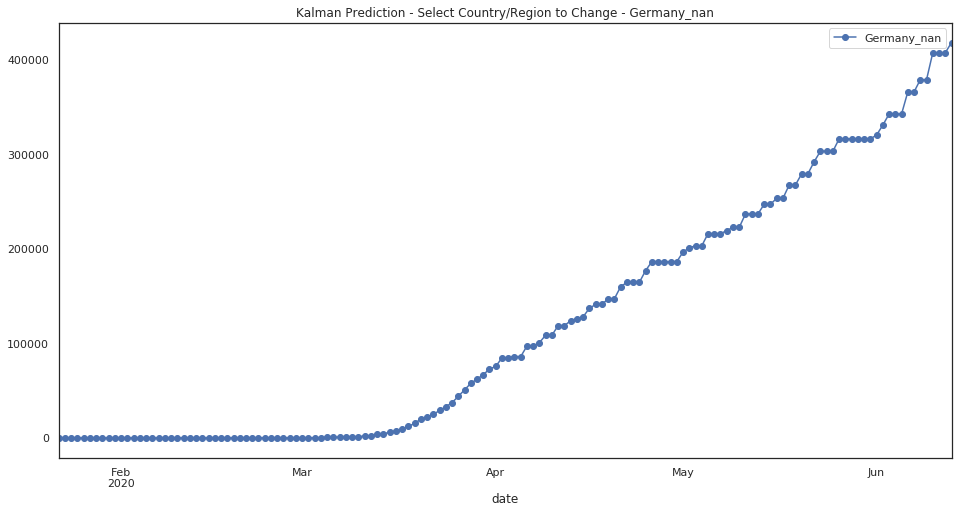

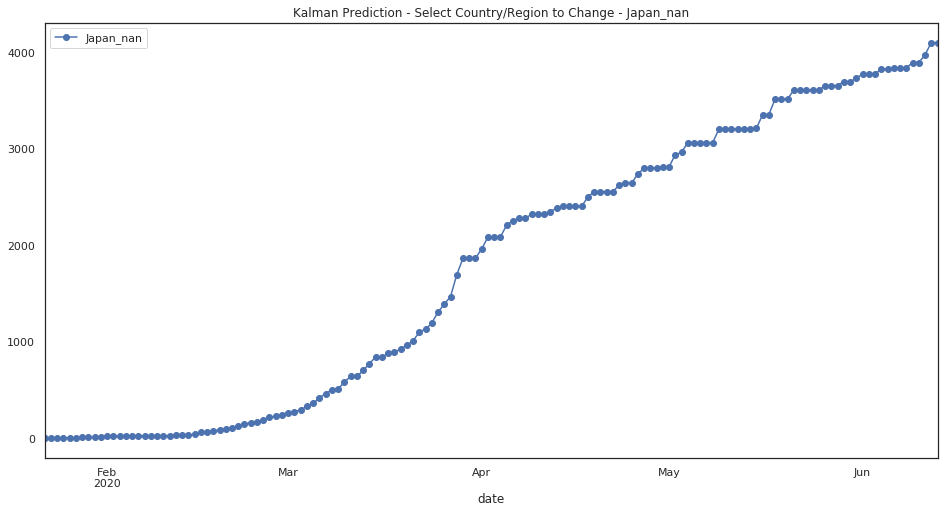

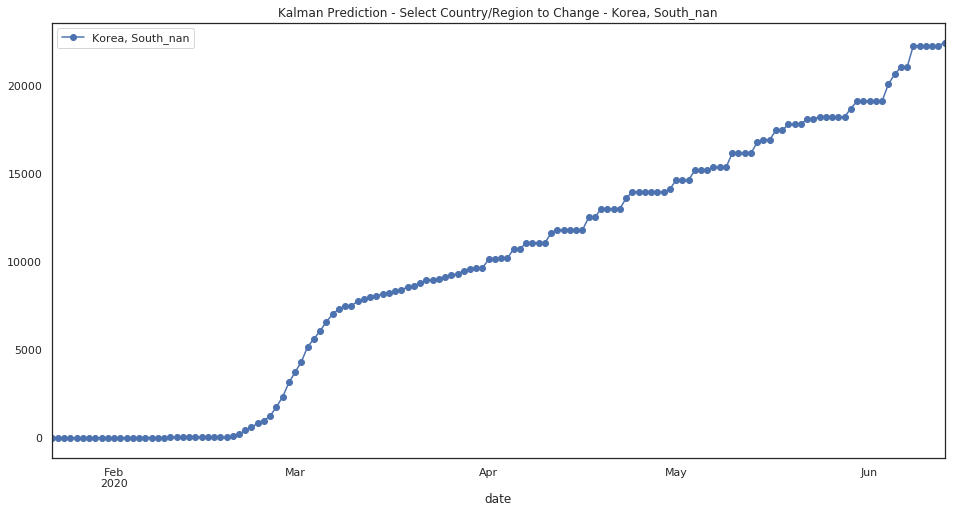

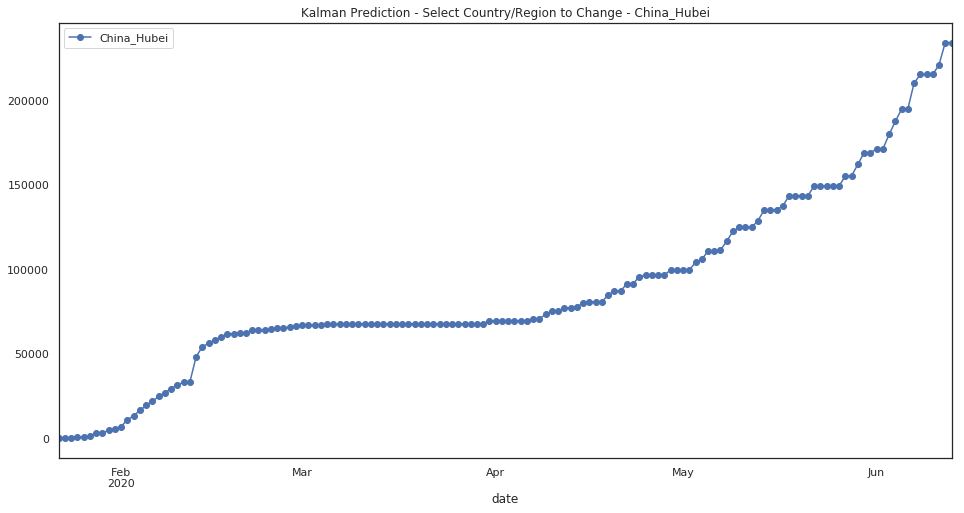

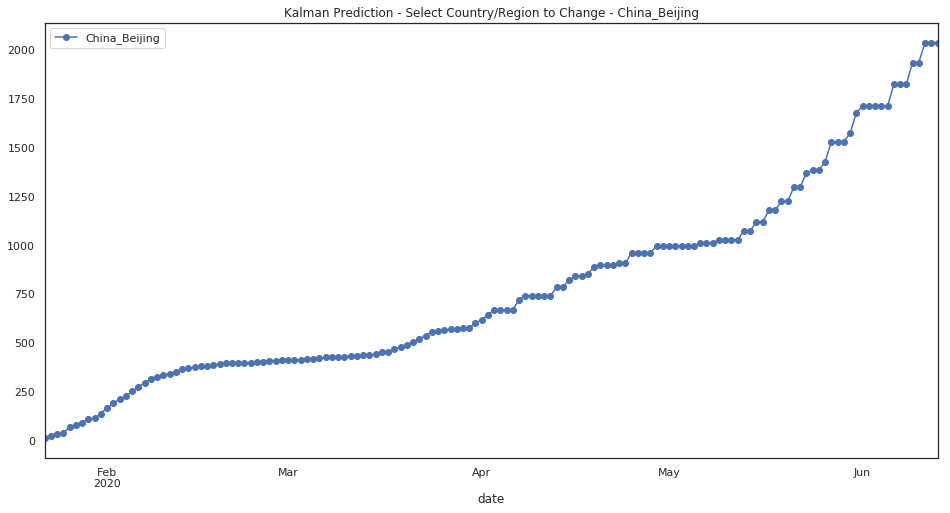

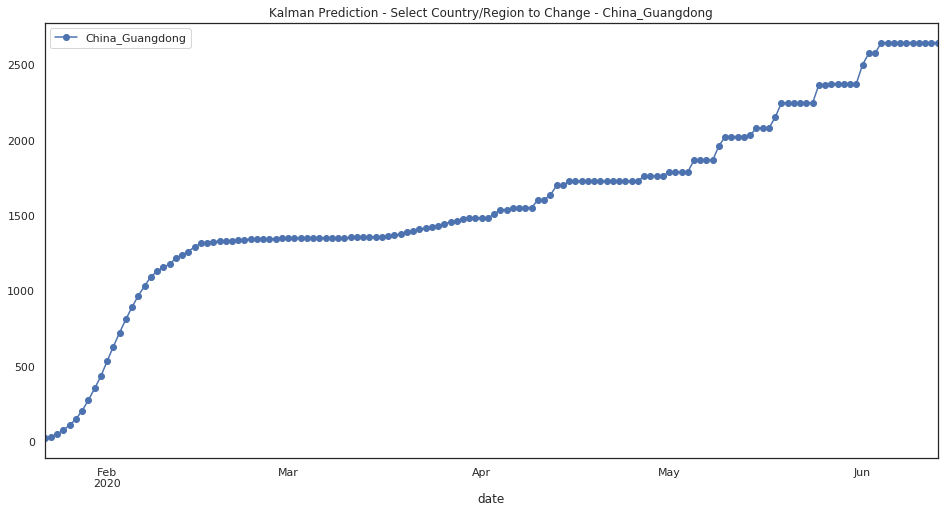

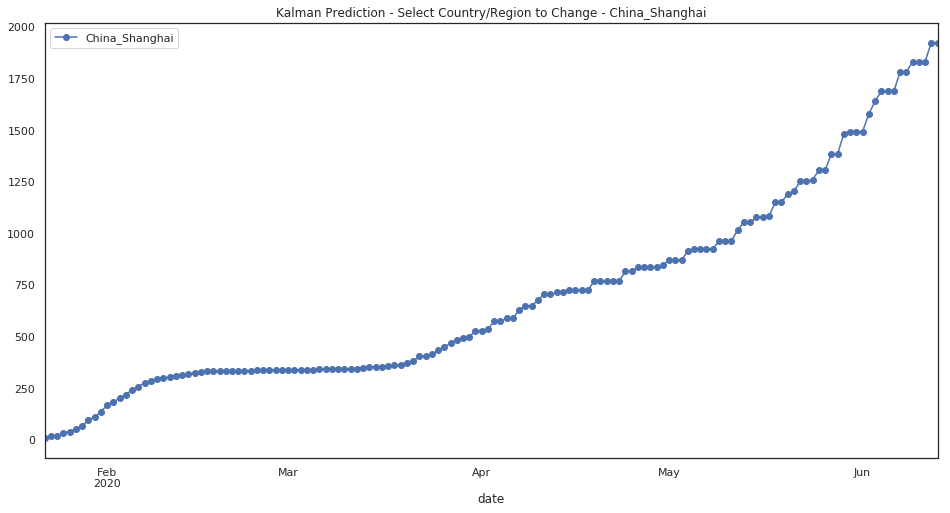

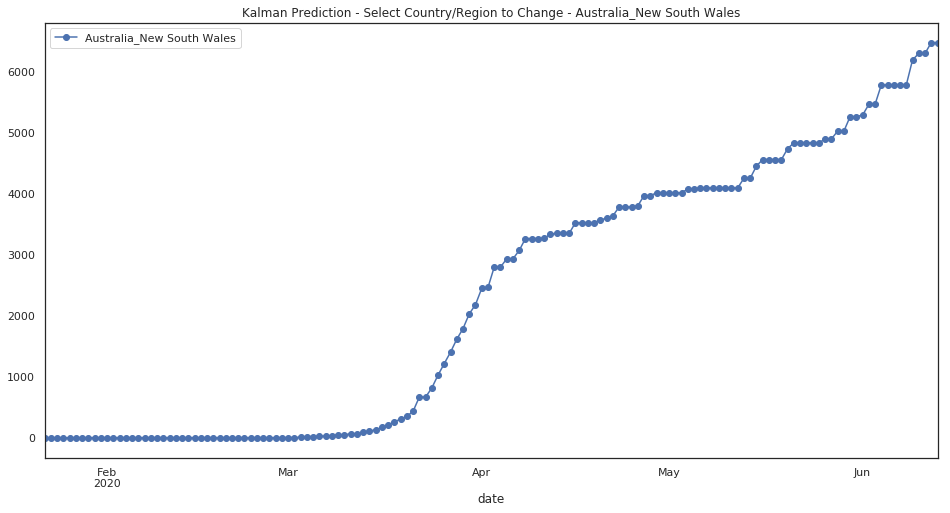

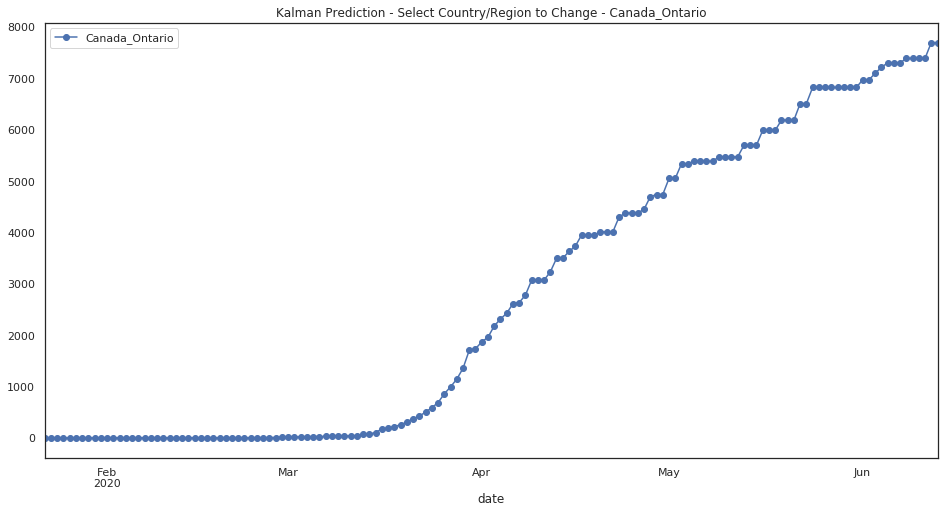

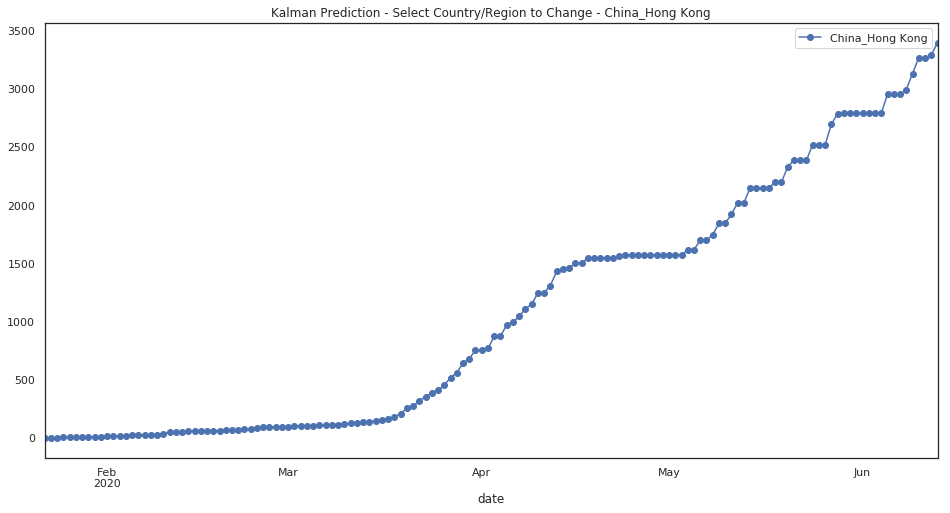

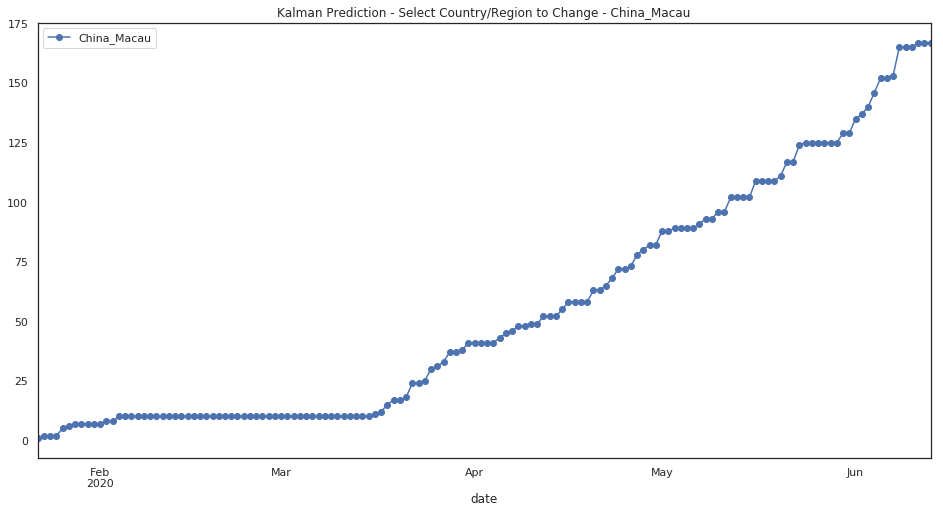

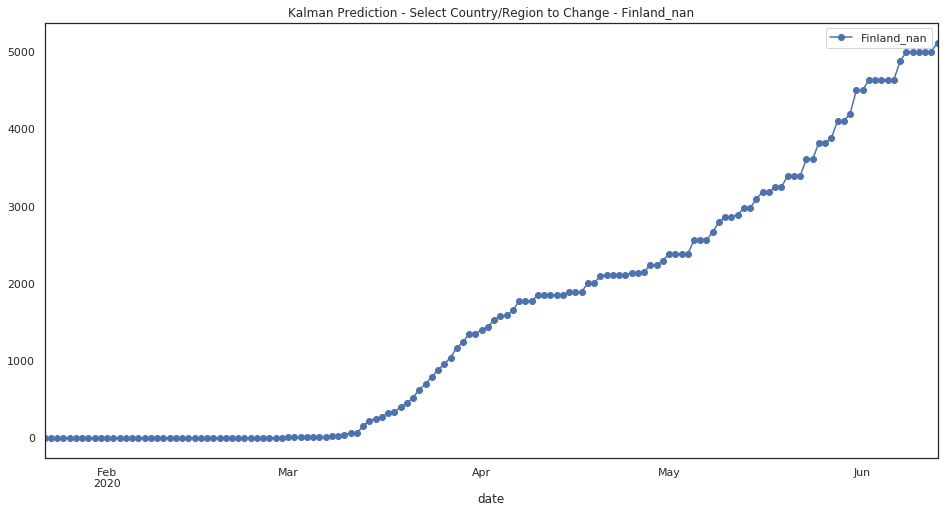

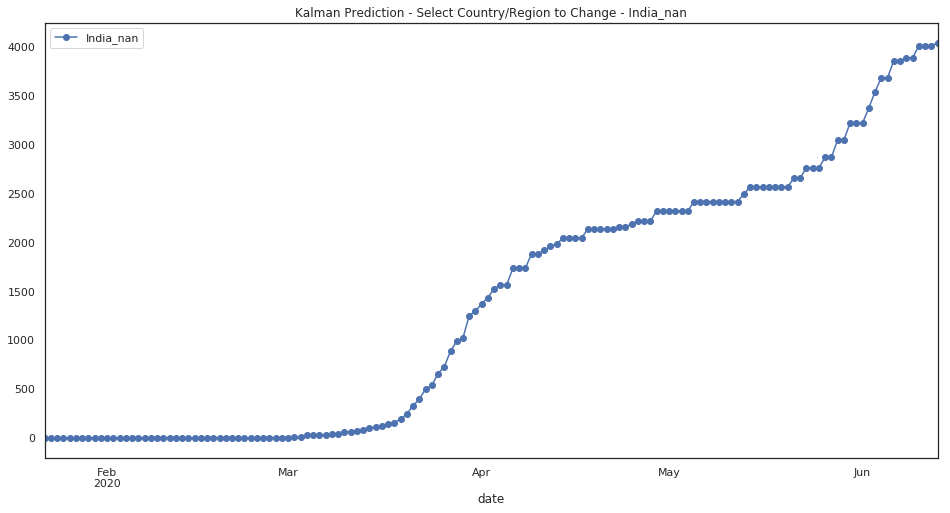

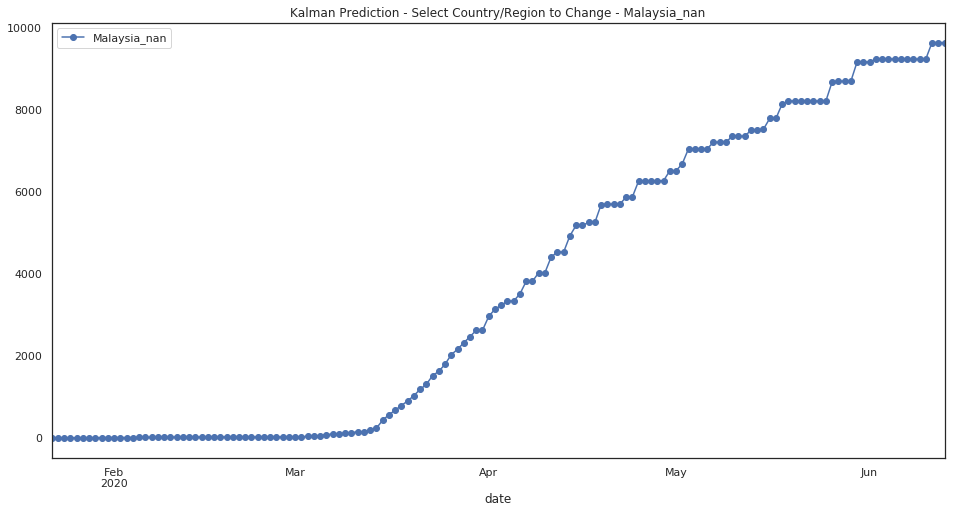

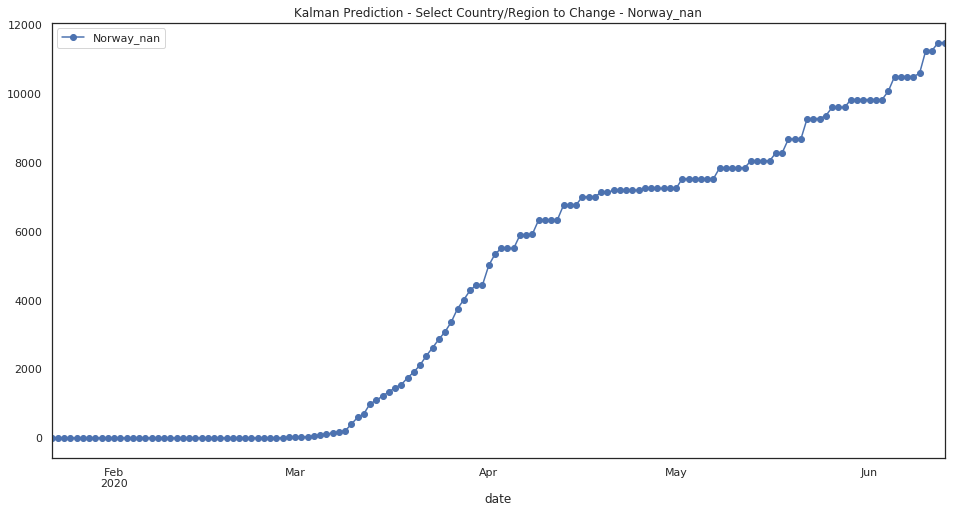

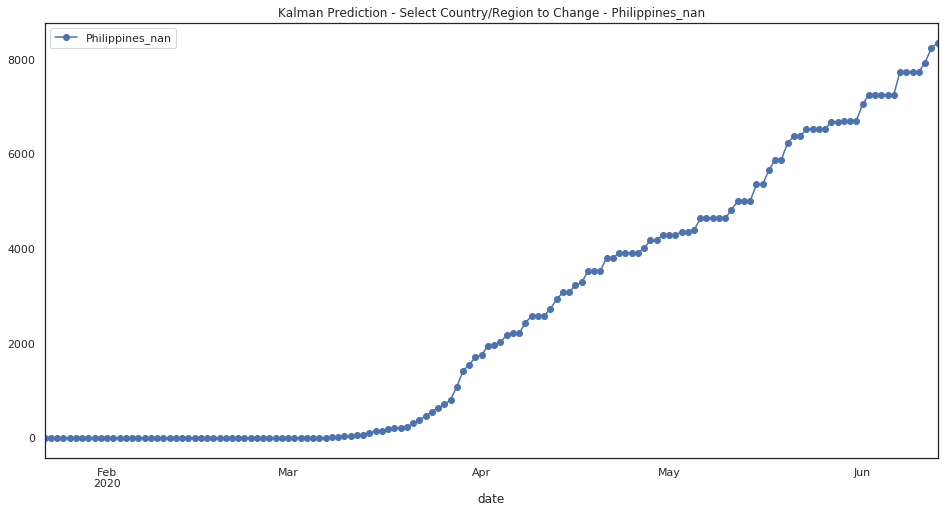

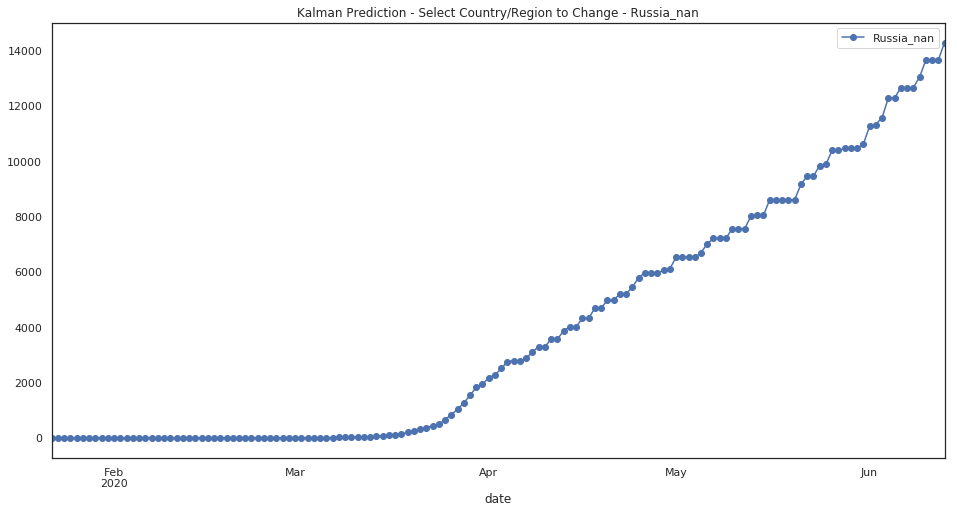

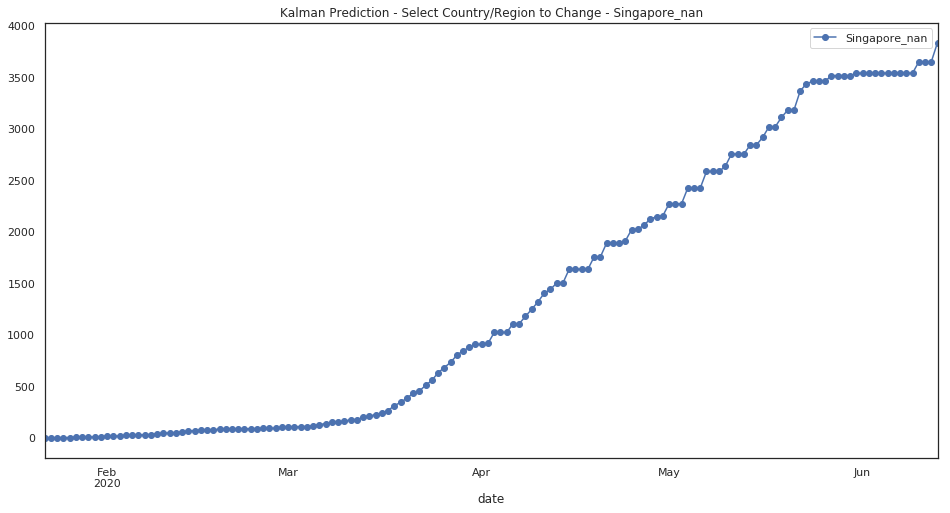

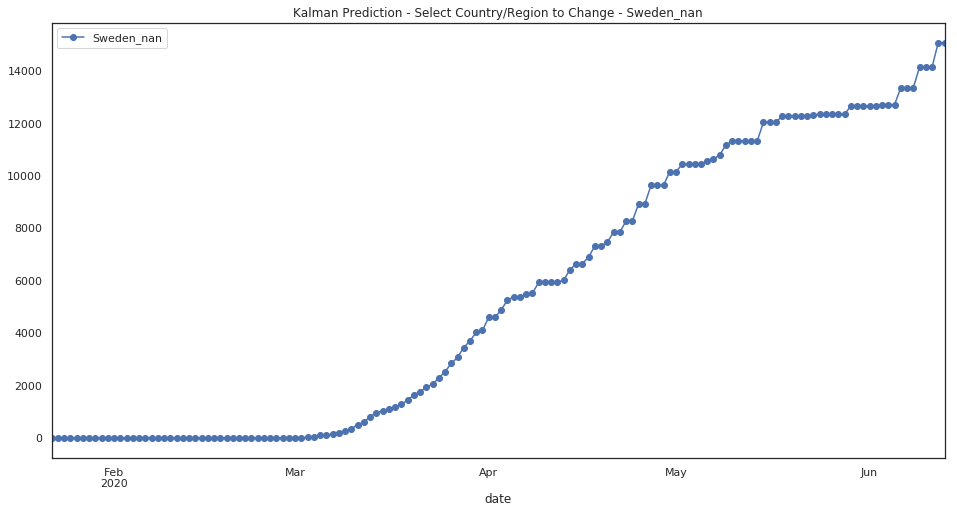

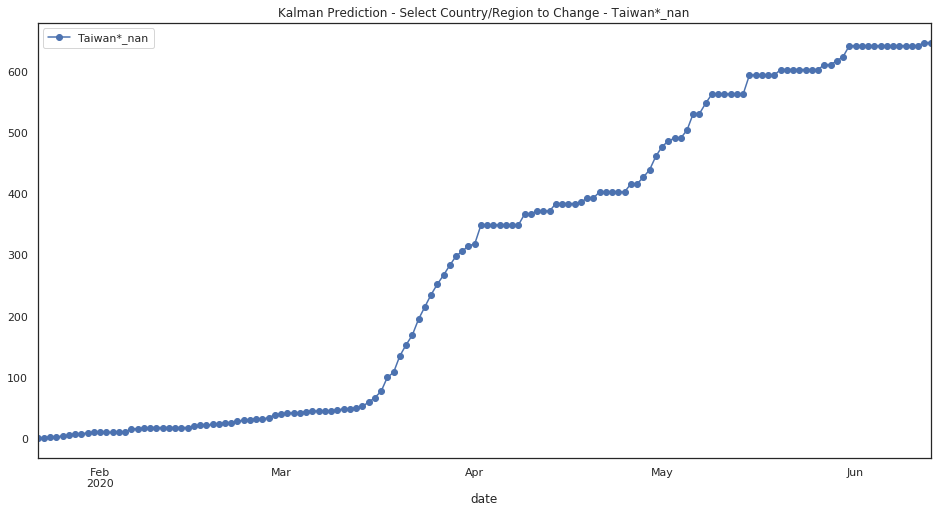

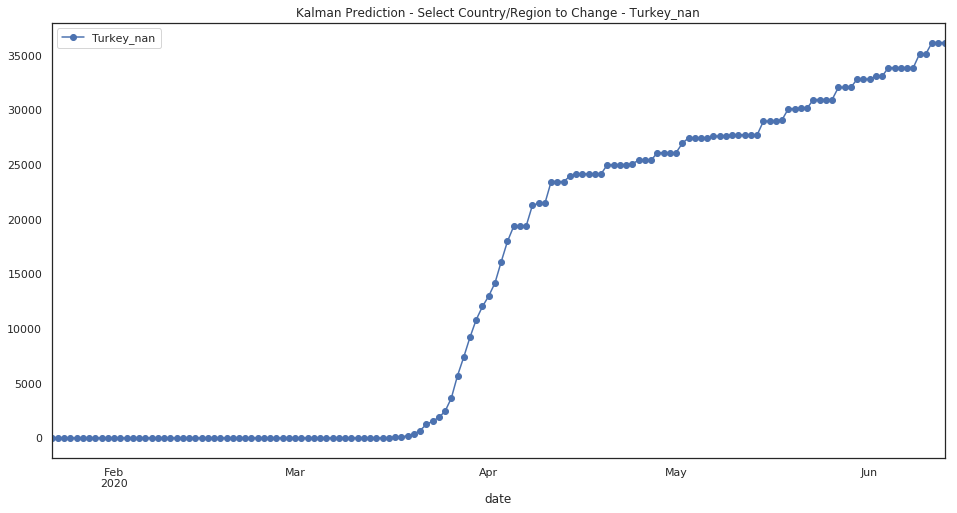

In [53]:
### Joao - Dynamic print
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Poland_nan')

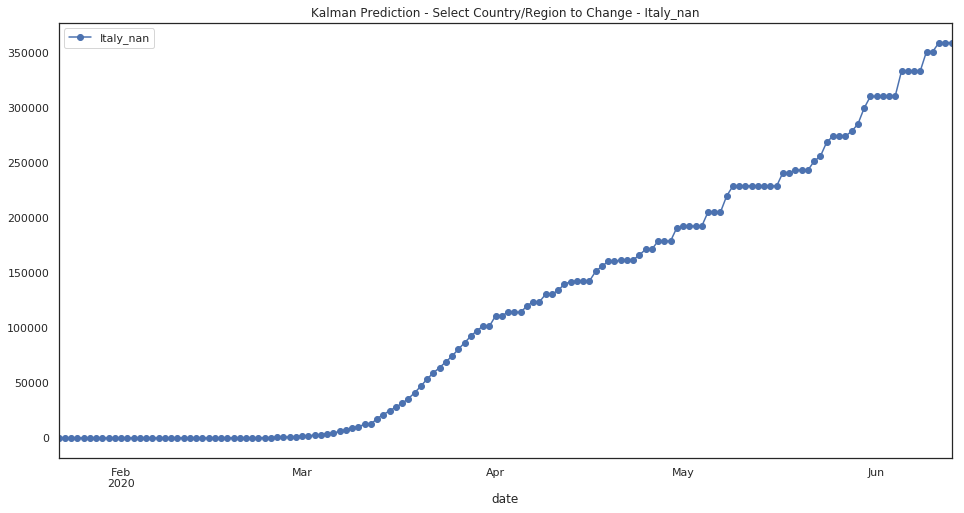

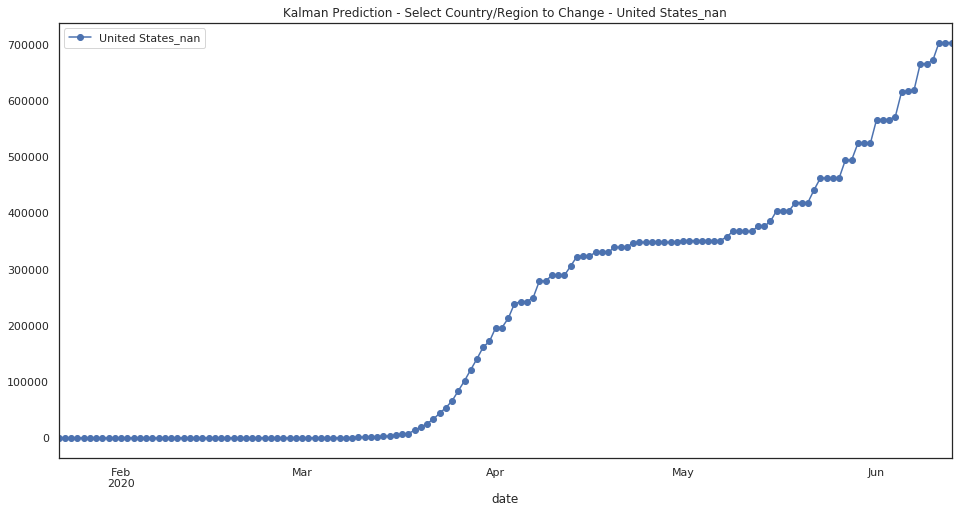

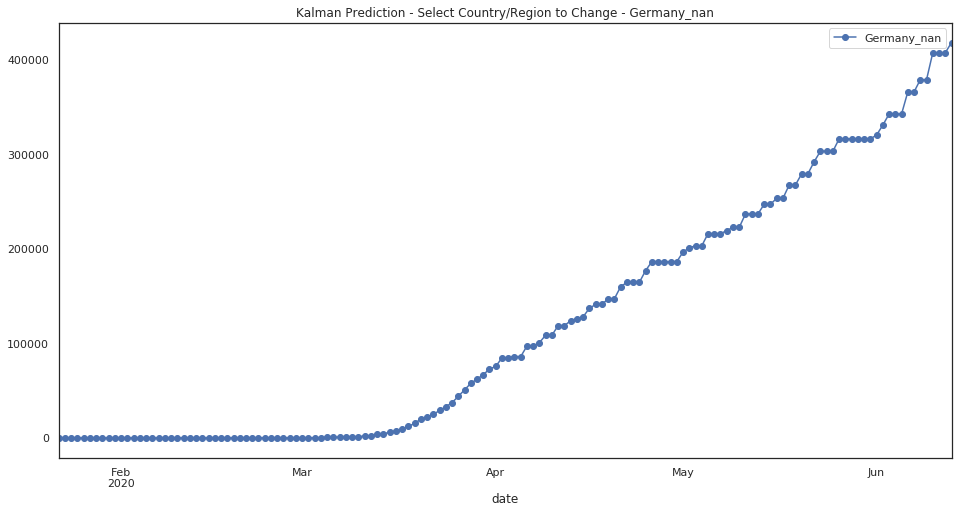

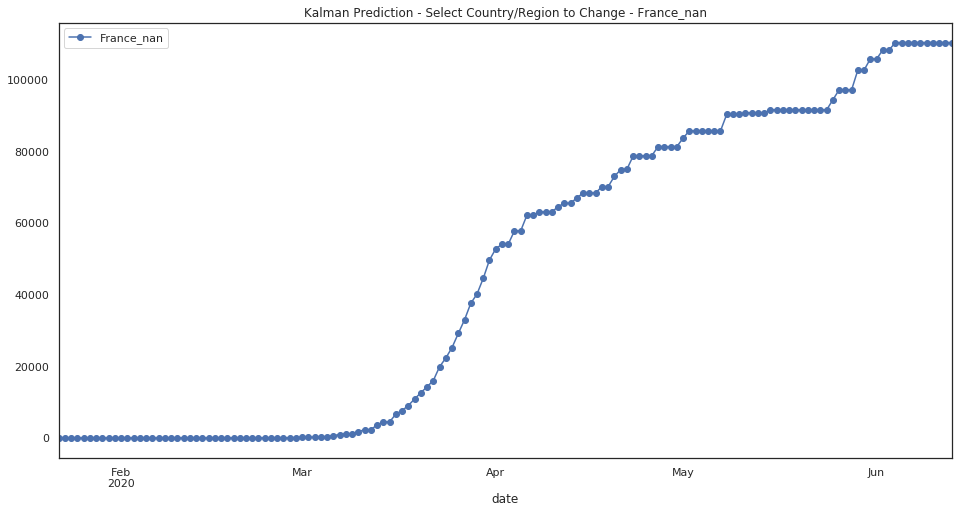

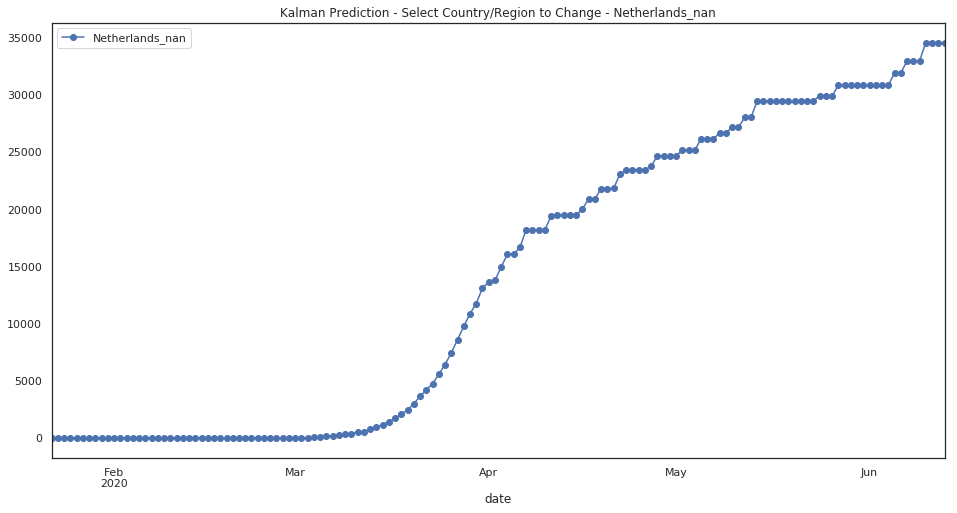

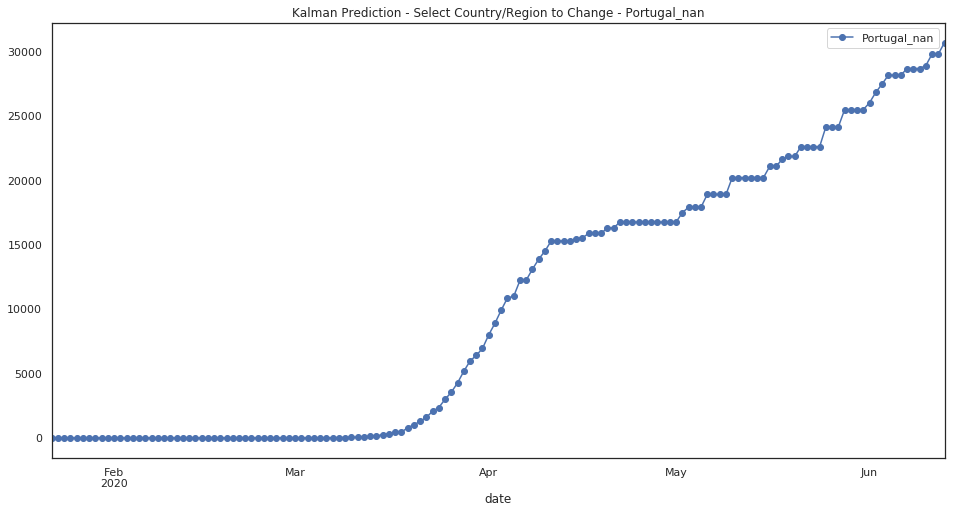

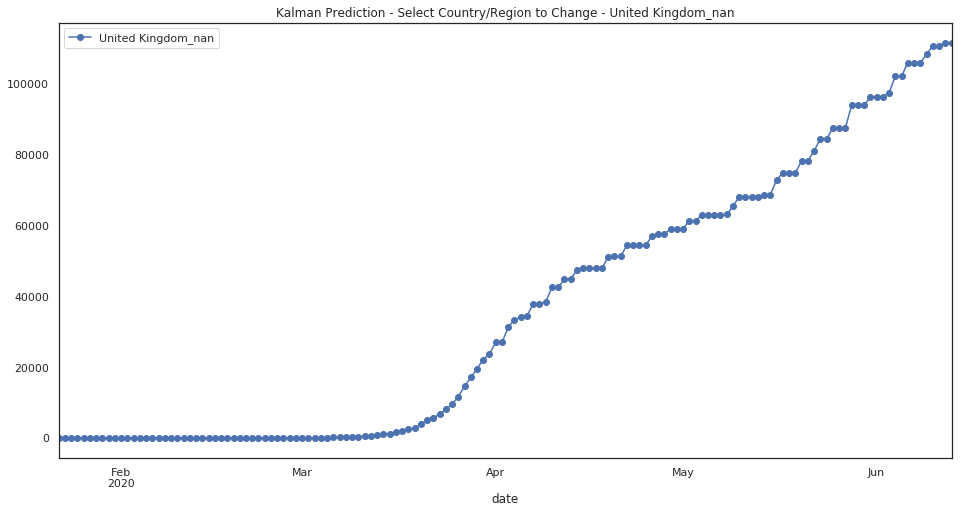

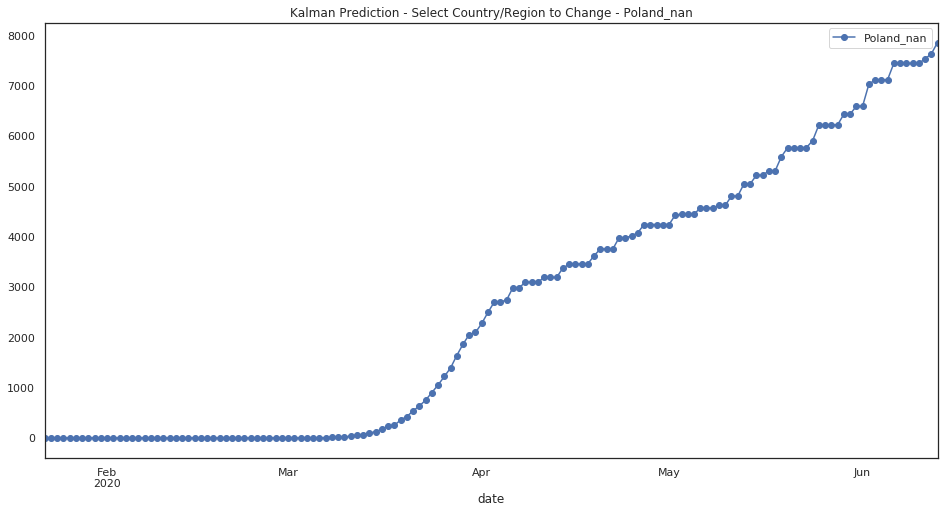

In [54]:
### JOAO - Old code
p_kalman3=all_new[['date','Italy_nan']]
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))

p_kalman4=all_new[['date','United States_nan']]
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))

p_kalman5=all_new[['date','Germany_nan']]
p_kalman5=p_kalman5.set_index(['date'])
p_kalman5.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman5.columns[0]))

p_kalman6=all_new[['date','France_nan']]
p_kalman6=p_kalman6.set_index(['date'])
p_kalman6.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman6.columns[0]))

p_kalman7=all_new[['date','Netherlands_nan']]
p_kalman7=p_kalman7.set_index(['date'])
p_kalman7.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman7.columns[0]))

p_kalman8=all_new[['date','Portugal_nan']]
p_kalman8=p_kalman8.set_index(['date'])
p_kalman8.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman8.columns[0]))

p_kalman9=all_new[['date','United Kingdom_nan']]
p_kalman9=p_kalman9.set_index(['date'])
p_kalman9.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman9.columns[0]))

p_kalman10=all_new[['date','Poland_nan']]
p_kalman10=p_kalman10.set_index(['date'])
p_kalman10.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman10.columns[0]))


In [55]:
t.to_csv(r't_confirmed_global.csv')

In [56]:
all_new.to_csv(r'prediction_kalman_filter_global.csv')

## Iterative Regression

In [57]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [58]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max


In [59]:
test_iter[35620:35650]

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max
33010,2020-04-06,United Kingdom_Channel Islands,238.0,24.0,54.0,109.0,112.953368,133.742331,201.851852,217.0,238.0,1,1090000.0,0.0,0.0
33011,2020-04-07,United Kingdom_Channel Islands,247.0,21.0,56.0,97.0,110.138249,131.318681,169.503546,238.0,247.0,1,1195000.0,0.0,0.0
33012,2020-04-08,United Kingdom_Channel Islands,277.0,9.0,54.0,106.0,104.201681,128.497409,175.886525,247.0,277.0,1,1240000.0,0.0,0.0
33013,2020-04-09,United Kingdom_Channel Islands,298.0,30.0,60.0,122.0,112.550607,128.110599,179.354839,277.0,298.0,1,1390000.0,0.0,0.0
33014,2020-04-10,United Kingdom_Channel Islands,298.0,21.0,60.0,135.0,107.942238,125.630252,183.435583,298.0,298.0,1,1495000.0,0.0,0.0
33015,2020-04-11,United Kingdom_Channel Islands,330.0,0.0,51.0,116.0,100.335570,121.052632,164.285714,298.0,330.0,1,1495000.0,0.0,0.0
33016,2020-04-12,United Kingdom_Channel Islands,340.0,32.0,53.0,137.0,111.073826,119.494585,171.502591,330.0,340.0,1,1655000.0,0.0,0.0
33017,2020-04-13,United Kingdom_Channel Islands,340.0,10.0,42.0,123.0,103.333333,114.429530,157.142857,340.0,340.0,1,1705000.0,0.0,0.0
33018,2020-04-14,United Kingdom_Channel Islands,356.0,0.0,42.0,102.0,100.294118,114.429530,143.277311,340.0,356.0,1,1705000.0,0.0,0.0
33019,2020-04-15,United Kingdom_Channel Islands,387.0,16.0,26.0,109.0,105.000000,108.181818,144.534413,356.0,387.0,1,1785000.0,0.0,0.0


In [60]:
test_iter[35760:35790]

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max
33150,2020-04-01,United Kingdom_Gibraltar,76.0,3.0,16.0,57.0,105.797101,130.357143,486.666667,72.0,76.0,1,365000.0,0.0,0.0
33151,2020-04-02,United Kingdom_Gibraltar,88.0,4.0,11.0,50.0,106.944444,118.461538,296.153846,76.0,88.0,1,385000.0,0.0,0.0
33152,2020-04-03,United Kingdom_Gibraltar,93.0,12.0,19.0,53.0,117.105263,128.985507,254.285714,88.0,93.0,1,445000.0,0.0,0.0
33153,2020-04-04,United Kingdom_Gibraltar,101.0,5.0,21.0,38.0,106.818182,130.555556,170.909091,93.0,101.0,1,470000.0,0.0,0.0
33154,2020-04-05,United Kingdom_Gibraltar,109.0,8.0,25.0,45.0,109.677419,134.210526,182.142857,101.0,109.0,1,510000.0,0.0,0.0
33155,2020-04-06,United Kingdom_Gibraltar,111.0,8.0,21.0,44.0,108.910891,125.000000,169.230769,109.0,111.0,1,550000.0,0.0,0.0
33156,2020-04-07,United Kingdom_Gibraltar,111.0,2.0,18.0,42.0,102.752294,120.430108,162.318841,111.0,111.0,1,560000.0,0.0,0.0
33157,2020-04-08,United Kingdom_Gibraltar,115.0,0.0,10.0,39.0,100.900901,110.891089,155.555556,111.0,115.0,1,560000.0,0.0,0.0
33158,2020-04-09,United Kingdom_Gibraltar,117.0,4.0,6.0,39.0,104.504505,106.422018,152.631579,115.0,117.0,1,580000.0,0.0,0.0
33159,2020-04-10,United Kingdom_Gibraltar,117.0,2.0,6.0,29.0,102.608696,106.306306,134.090909,117.0,117.0,1,590000.0,0.0,0.0


In [61]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [62]:
pred[:]

region,Afghanistan_nan,Albania_nan,Algeria_nan,Andorra_nan,Angola_nan,Antigua and Barbuda_nan,Argentina_nan,Armenia_nan,Australia_Australian Capital Territory,Australia_New South Wales,...,United Kingdom_Turks and Caicos Islands,United Kingdom_nan,United States_nan,Uruguay_nan,Uzbekistan_nan,Venezuela_nan,Vietnam_nan,West Bank and Gaza_nan,Zambia_nan,Zimbabwe_nan
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2.0,-2035070.0,2.0,-2035070.0,-2035070.0,-2035070.0,-2035070.0,-2035070.0,-2035070.0,4.0,...,-2035070.0,3.0,2.0,-2035070.0,-2035070.0,-2035070.0,4.0,-2035070.0,-2035070.0,-2035070.0
2020-01-23,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,2.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2020-01-24,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,2.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
2020-01-25,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,2.0,8.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2020-01-26,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,2.0,8.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2020-01-27,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,2.0,17.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
2020-01-28,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,2.0,11.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
2020-01-29,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,2.0,11.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
2020-01-30,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,2.0,14.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0


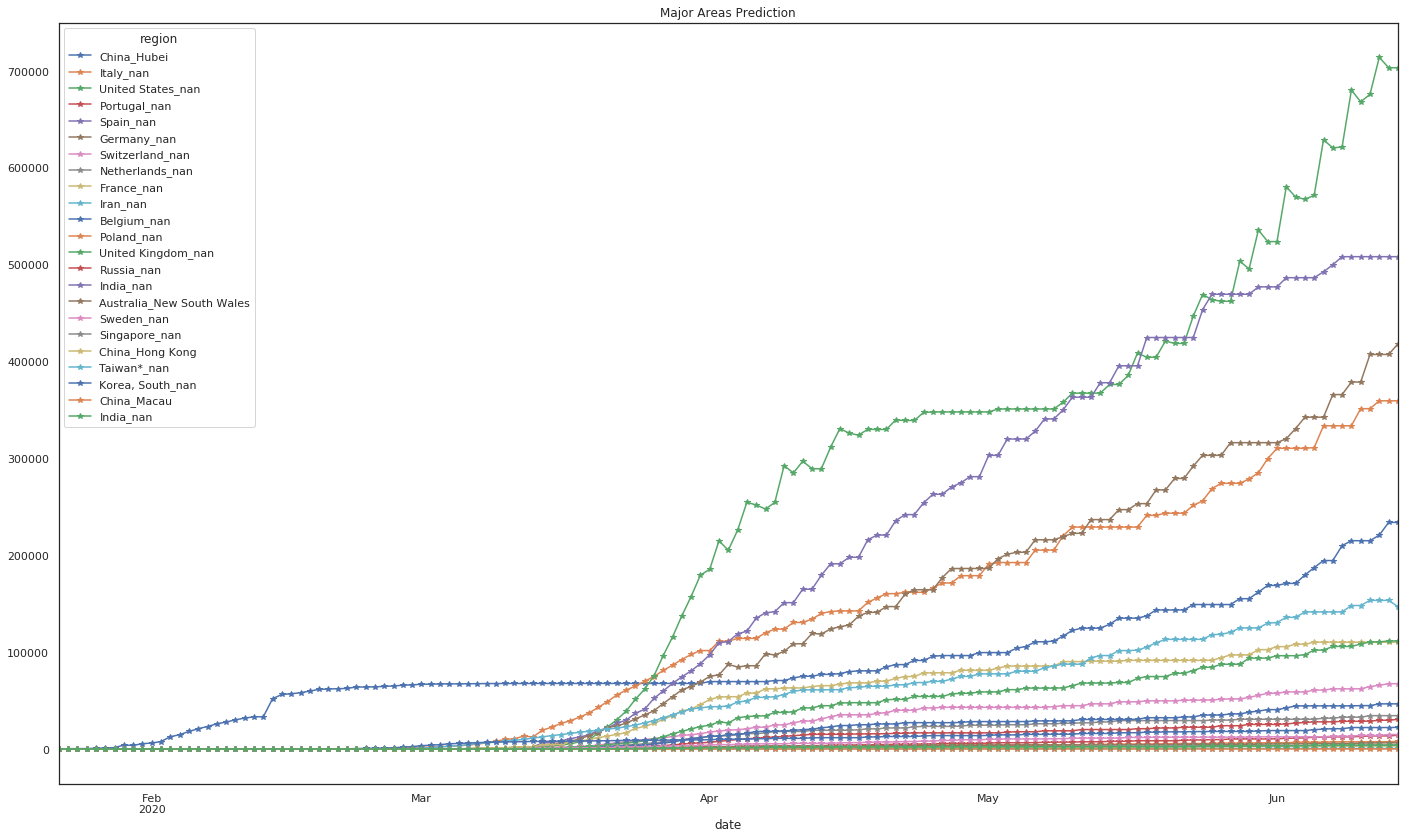

In [63]:
region=[

 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

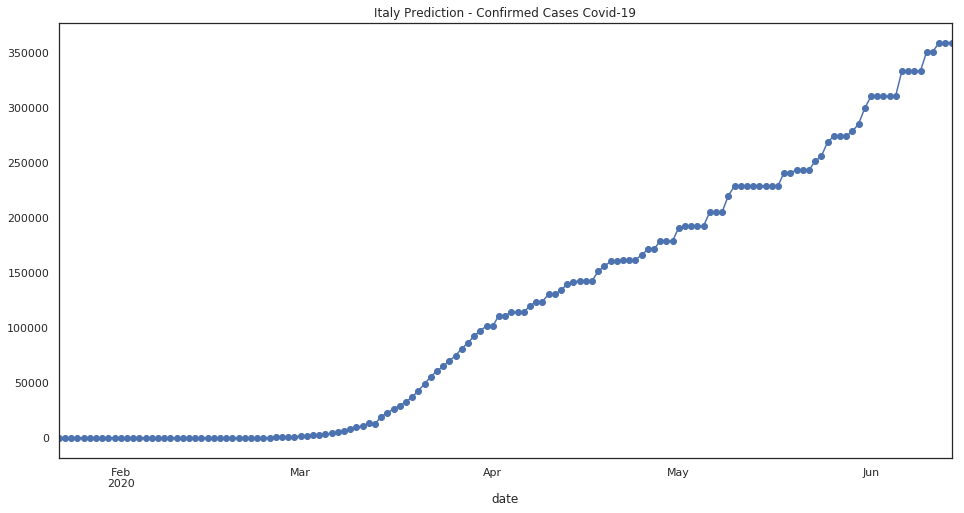

In [64]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

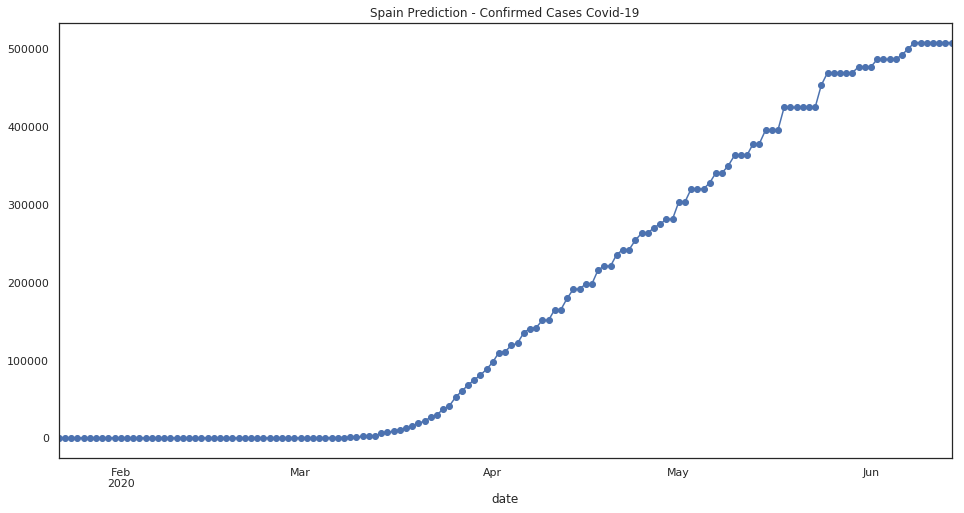

In [65]:
p3=pred['Spain_nan']
p3.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

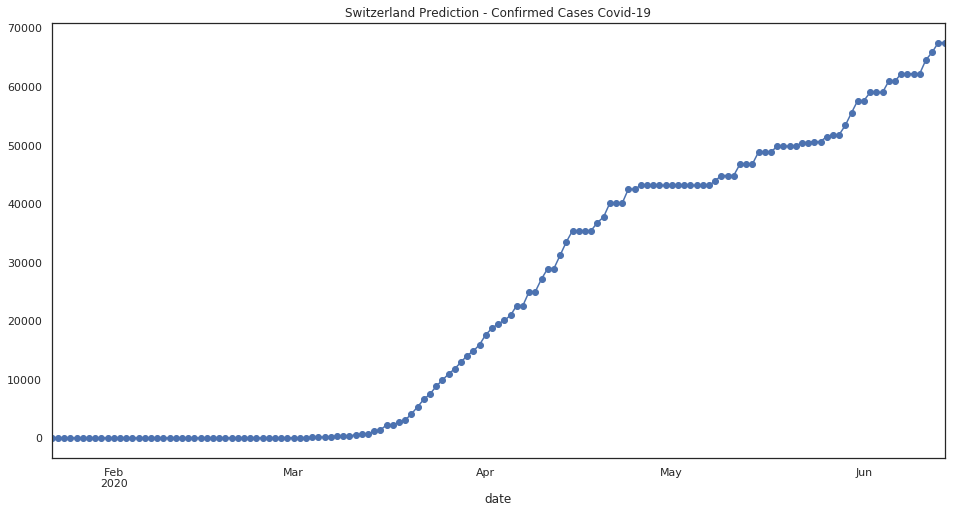

In [66]:
p4=pred['Switzerland_nan']
p4.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

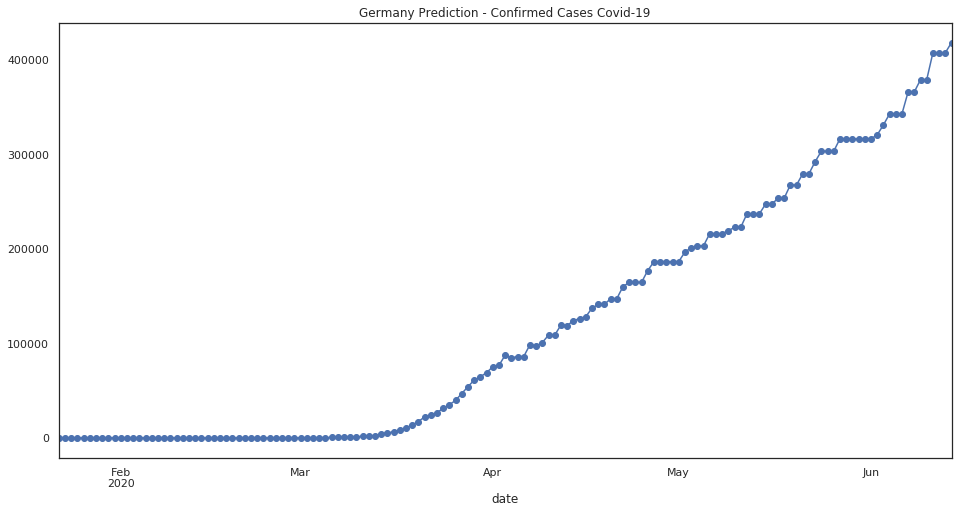

In [67]:
p5=pred['Germany_nan']
p5.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

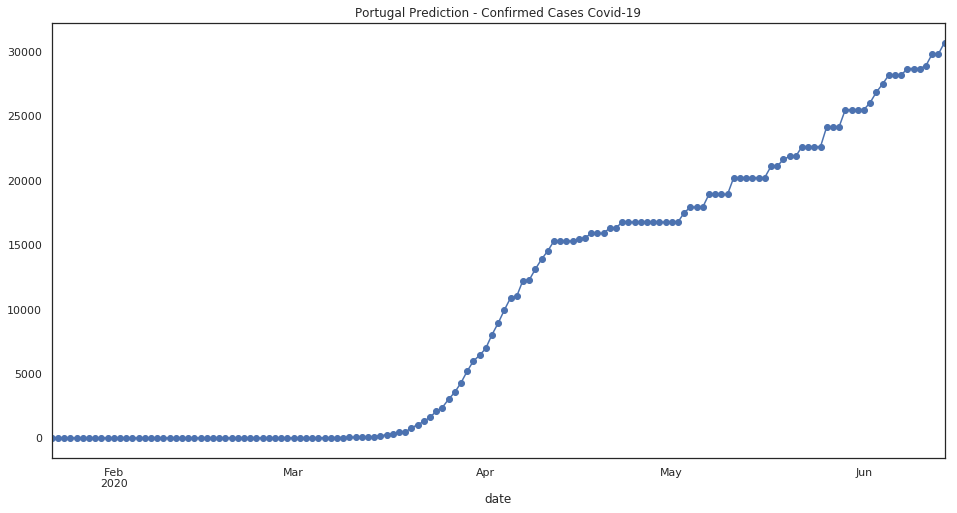

In [68]:
p6=pred['Portugal_nan']
p6.plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

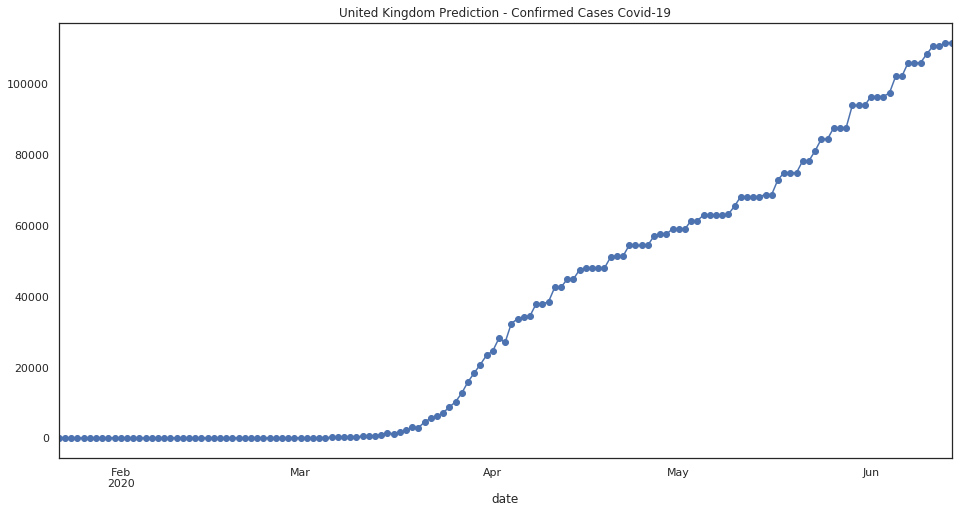

In [69]:
p8=pred['United Kingdom_nan']
p8.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

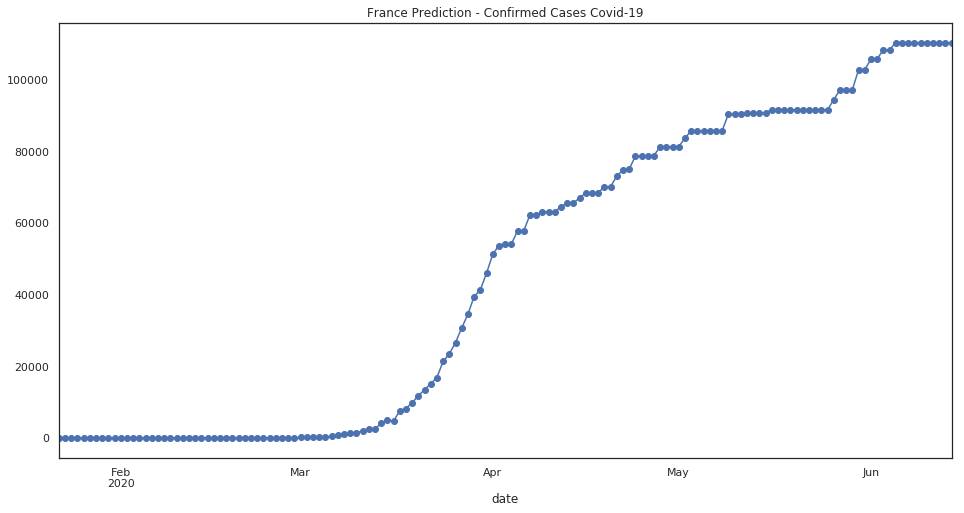

In [70]:
p9=pred['France_nan']
p9.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

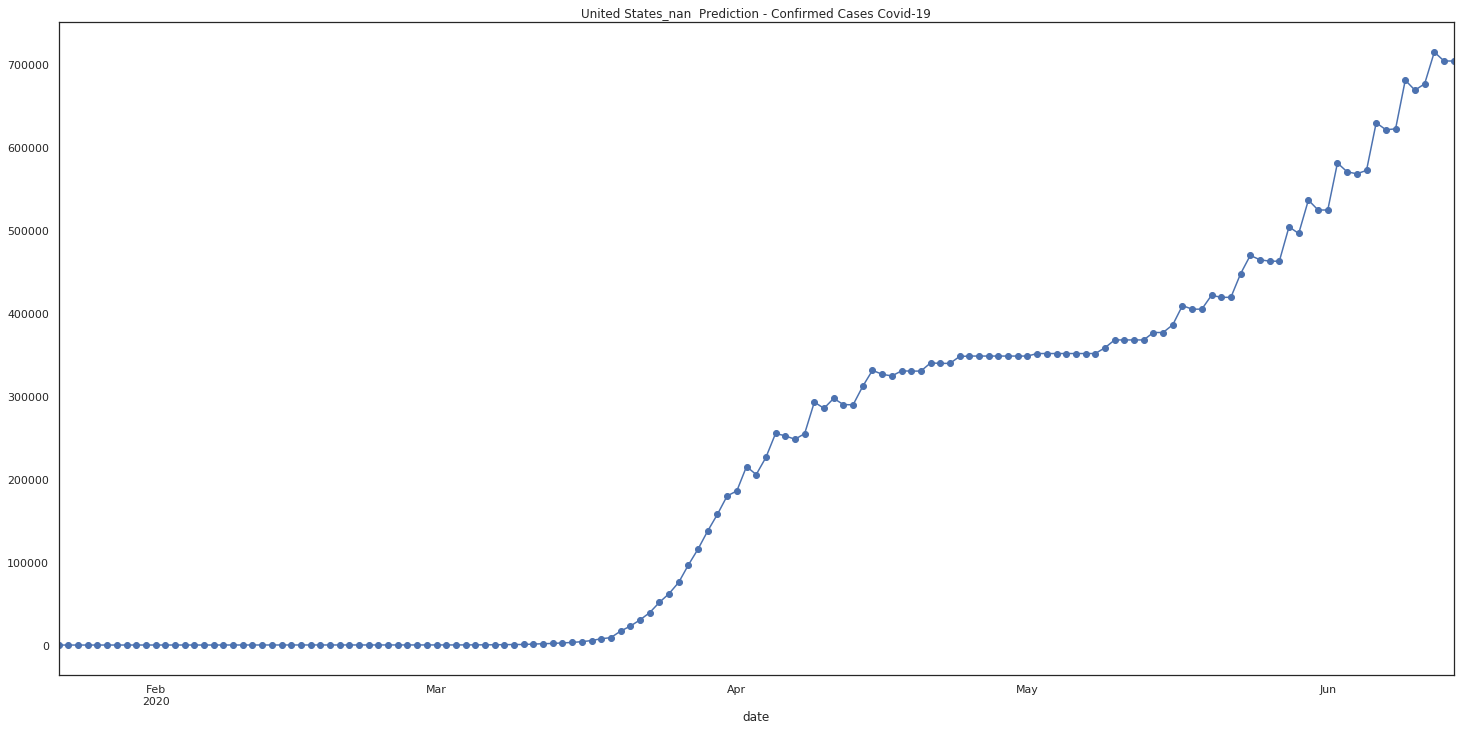

In [71]:
p10=pred['United States_nan']
p10.plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

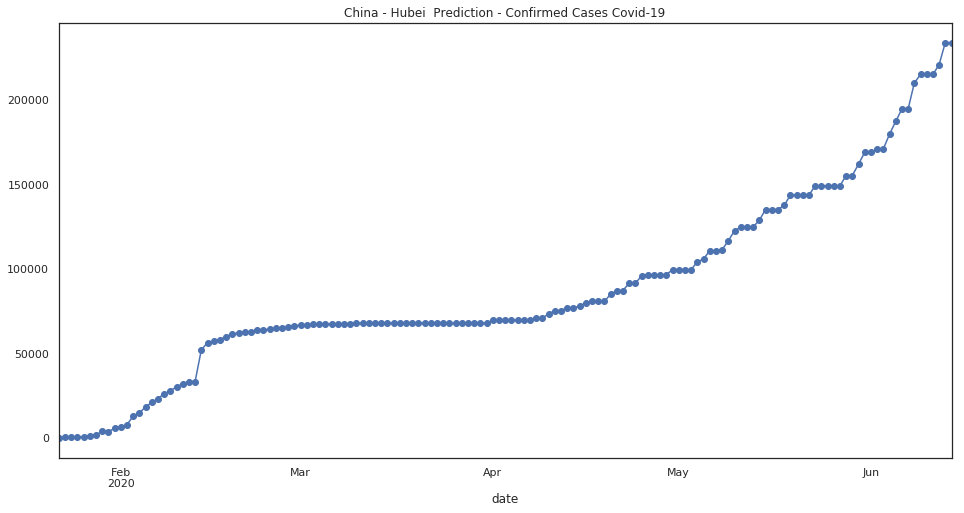

In [72]:
p11=pred['China_Hubei']
p11.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

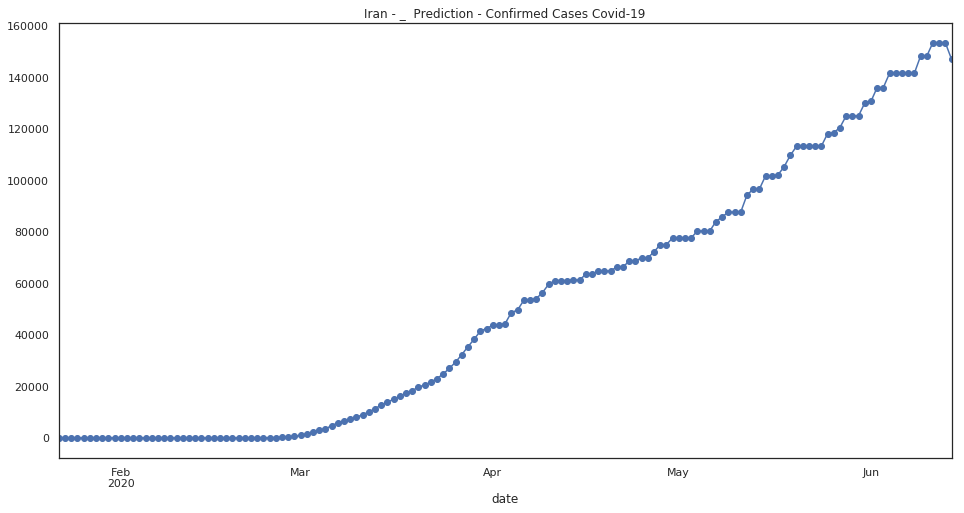

In [73]:
p12=pred['Iran_nan']
p12.plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

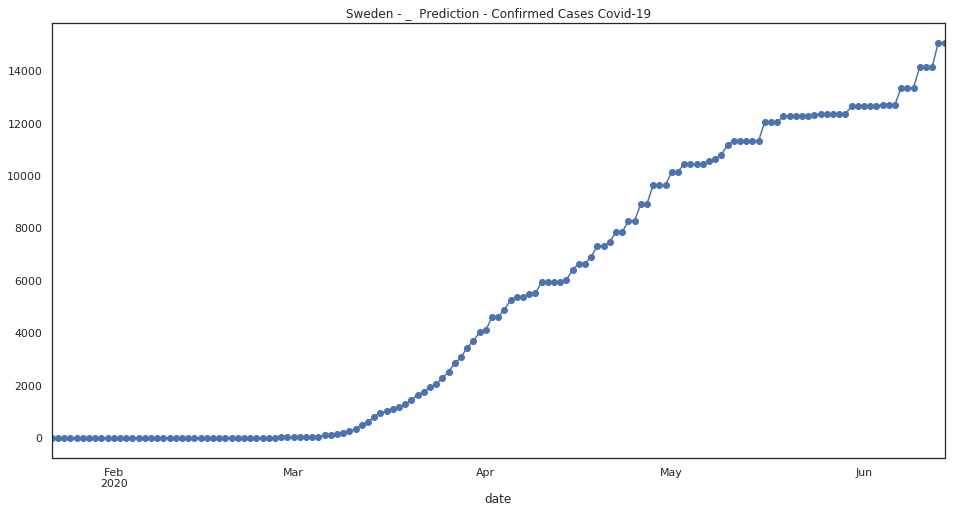

In [74]:
p13=pred['Sweden_nan']
p13.plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

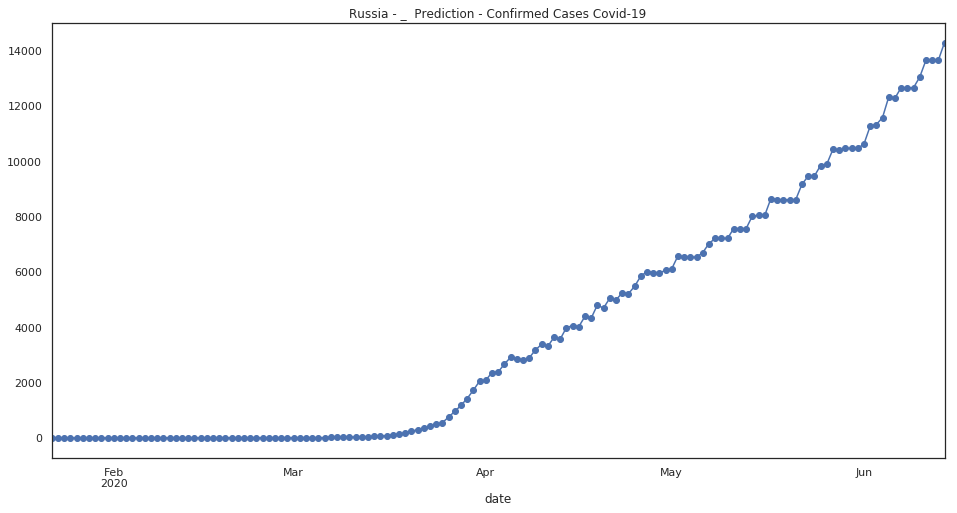

In [75]:
p13=pred['Russia_nan']
p13.plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

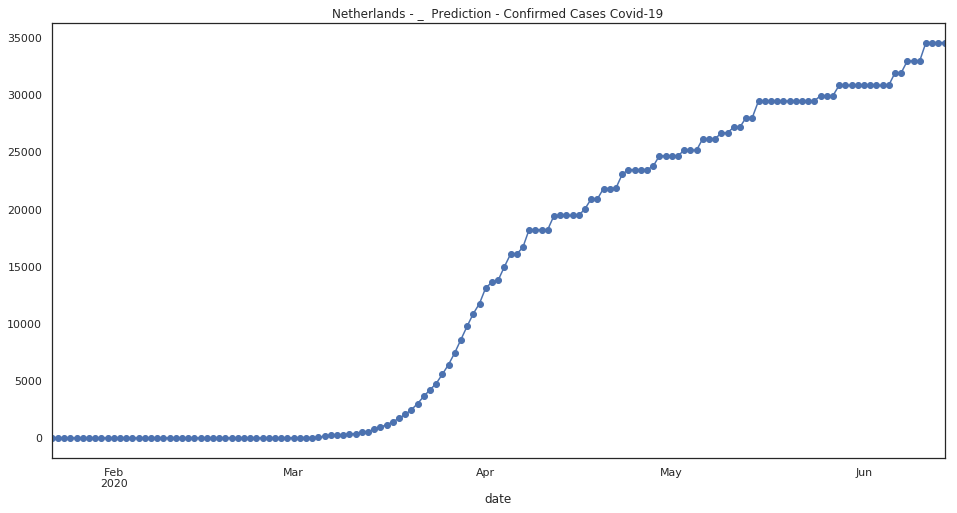

In [76]:
p14=pred['Netherlands_nan']
p14.plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

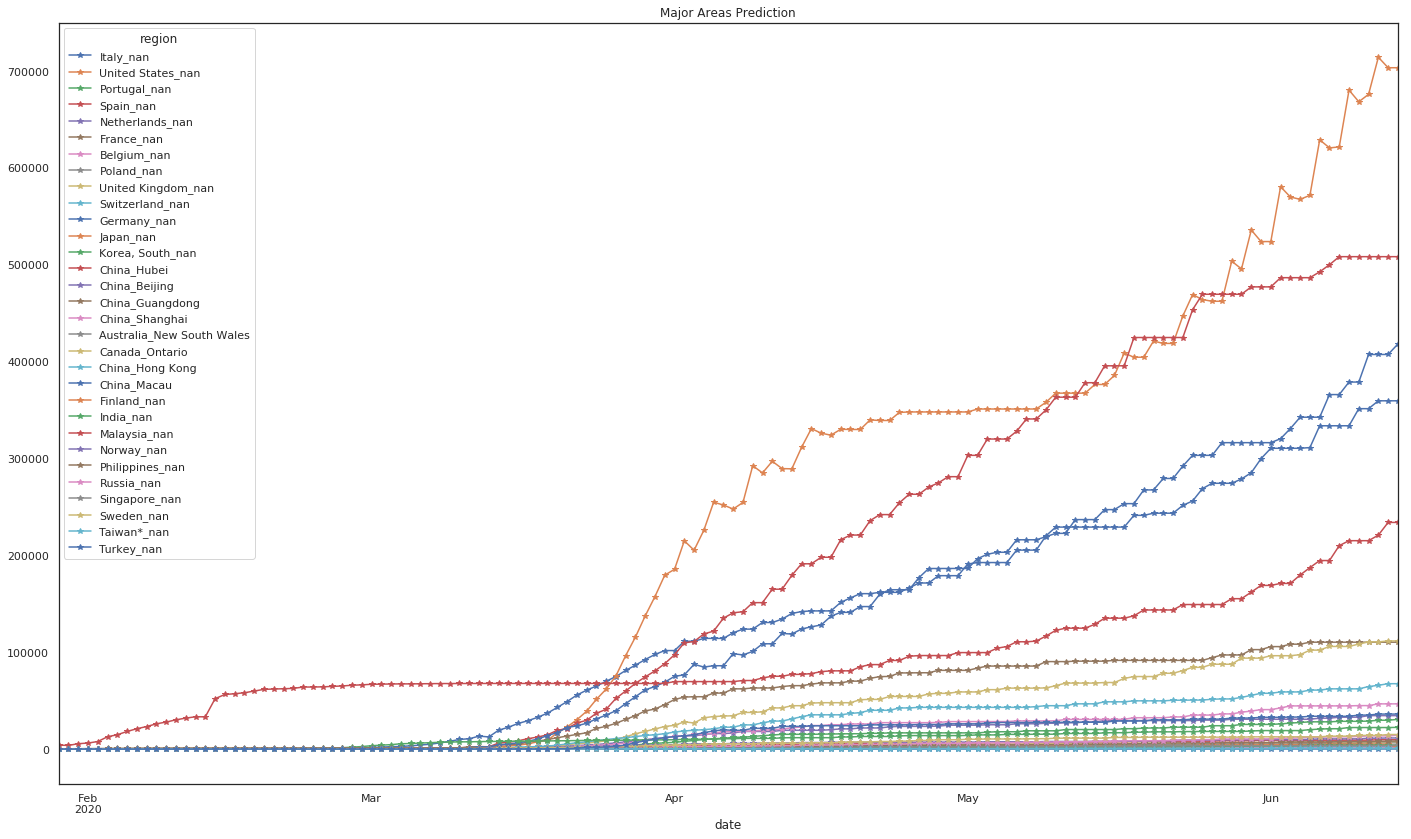

In [77]:
#region=my_train_list
pv2=pred[my_train_list]
pv2=pv2[7:]
pv2.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [78]:
pv1=pv2 #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [79]:
p[:]

region,Italy_nan,United States_nan,Portugal_nan,Spain_nan,Netherlands_nan,France_nan,Belgium_nan,Poland_nan,United Kingdom_nan,Switzerland_nan,...,Finland_nan,India_nan,Malaysia_nan,Norway_nan,Philippines_nan,Russia_nan,Singapore_nan,Sweden_nan,Taiwan*_nan,Turkey_nan
date,,,,,,,,,,,,,,,,,,,,,
2020-01-29,3.0,11.0,2.0,3.0,2.0,10.0,2.0,2.0,2.0,1.0,...,1.0,4.0,10.0,1.0,4.0,0.0,11.0,2.0,14.0,2.0
2020-01-30,3.0,14.0,2.0,3.0,2.0,12.0,2.0,2.0,2.0,1.0,...,2.0,4.0,15.0,1.0,4.0,1.0,9.0,2.0,19.0,2.0
2020-01-31,3.0,14.0,3.0,3.0,2.0,11.0,2.0,2.0,2.0,1.0,...,4.0,5.0,15.0,1.0,5.0,0.0,20.0,2.0,21.0,2.0
2020-02-01,6.0,16.0,3.0,3.0,2.0,13.0,2.0,2.0,5.0,1.0,...,4.0,8.0,14.0,1.0,8.0,2.0,16.0,3.0,16.0,2.0
2020-02-02,7.0,17.0,2.0,4.0,2.0,14.0,2.0,2.0,7.0,1.0,...,6.0,8.0,16.0,1.0,8.0,3.0,18.0,5.0,16.0,2.0
2020-02-03,7.0,14.0,3.0,7.0,2.0,13.0,2.0,2.0,7.0,1.0,...,6.0,13.0,15.0,1.0,13.0,3.0,18.0,5.0,15.0,2.0
2020-02-04,8.0,19.0,3.0,7.0,2.0,13.0,2.0,2.0,8.0,1.0,...,5.0,14.0,15.0,1.0,11.0,4.0,18.0,6.0,14.0,2.0
2020-02-05,8.0,18.0,2.0,8.0,2.0,12.0,3.0,2.0,7.0,1.0,...,6.0,12.0,18.0,1.0,11.0,5.0,24.0,7.0,15.0,2.0
2020-02-06,8.0,18.0,2.0,8.0,2.0,12.0,6.0,2.0,7.0,1.0,...,7.0,11.0,19.0,1.0,9.0,6.0,28.0,7.0,15.0,2.0


In [80]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [81]:
p.to_csv('/home/notebookuser/notebooks/covid19/p_confirmed_daily.csv', index = True)

In [83]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [84]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [85]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),:]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 


In [86]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("Heatmap-+1-"+datemap+".html")

In [87]:
print("Stats and Forecast Done for Today!")
print("I'm done with this month of March!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this month of March!
 April-May-June are going to be hard with this Global Lock-Down!


In [88]:
exit()

H2O session _sid_bde5 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
